# Anime Data Analysis
This notebook performs **exploratory data analysis (EDA)** on an anime dataset

In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"C:\Users\manda\Desktop\anime.csv")

In [46]:
df.head()

id                             Title      Votes            Status Types  \
0   5114  Fullmetal Alchemist: Brotherhood  1846307.0   finished_airing    tv   
1  11061            Hunter x Hunter (2011)  1488156.0   finished_airing    tv   
2   9253                       Steins;Gate  1240087.0   finished_airing    tv   
3     21                         One Piece  1076776.0  currently_airing    tv   
4   1535                        Death Note  2426765.0   finished_airing    tv   

   Episodes  Score        Source    Members  Popularity  Favourites Rating  \
0      64.0   9.14         manga  2897486.0         3.0    202552.0      r   
1     148.0   9.05         manga  2387337.0        10.0    182740.0  pg_13   
2      24.0   9.08  visual_novel  2248209.0        13.0    171579.0  pg_13   
3       NaN   8.65         manga  1893379.0        26.0    167571.0  pg_13   
4      37.0   8.62         manga  3421349.0         2.0    155891.0      r   

     Year  Season                                             Genres  \
0  2009.0  spring  ['Action', 'Adventure', 'Drama', 'Fantasy', 'M...   
1  2011.0    fall      ['Action', 'Adventure', 'Fantasy', 'Shounen']   
2  2011.0  spring  ['Drama', 'Psychological', 'Sci-Fi', 'Suspense...   
3  1999.0    fall      ['Action', 'Adventure', 'Fantasy', 'Shounen']   
4  2006.0    fall  ['Psychological', 'Shounen', 'Supernatural', '...   

                       Studios  
0                    ['Bones']  
1  ['Madhouse', 'Studio Live']  
2                ['White Fox']  
3           ['Toei Animation']  
4                 ['Madhouse']

In [47]:
df.sample(5)

id                     Title     Votes           Status    Types  \
16885  42330  Sansan de Ezuoju Chufang      14.0  finished_airing      ona   
14907  45865       Baxianguohai (2019)       NaN  finished_airing       tv   
764    35466      ReLIFE: Kanketsu-hen  199003.0  finished_airing  special   
18359  32637                  Usawaltz     224.0  finished_airing      ona   
9135    2806                   Yadamon     300.0  finished_airing       tv   

       Episodes  Score     Source   Members  Popularity  Favourites Rating  \
16885      10.0    NaN   original     145.0     17993.0         NaN      g   
14907      10.0    NaN      other       NaN         NaN         NaN     pg   
764         4.0   8.21  web_manga  332077.0       573.0      1558.0  pg_13   
18359       1.0   4.90   original     457.0     13916.0         NaN  pg_13   
9135      170.0   6.41        NaN    1284.0     11053.0         4.0  pg_13   

         Year  Season                                  Genres  \
16885  2020.0  summer             ['Comedy', 'Slice of Life']   
14907     NaN     NaN                ['Adventure', 'Fantasy']   
764    2018.0  winter  ['Romance', 'School', 'Slice of Life']   
18359  2011.0  summer                ['Avant Garde', 'Music']   
9135   1992.0  summer      ['Adventure', 'Comedy', 'Fantasy']   

                     Studios  
16885                    NaN  
14907                    NaN  
764    ['TMS Entertainment']  
18359                    NaN  
9135           ['Group TAC']

In [48]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(24030, 16)
Index(['id', 'Title', 'Votes', 'Status', 'Types', 'Episodes', 'Score',
       'Source', 'Members', 'Popularity', 'Favourites', 'Rating', 'Year',
       'Season', 'Genres', 'Studios'],
      dtype='object')
id              int64
Title          object
Votes         float64
Status         object
Types          object
Episodes      float64
Score         float64
Source         object
Members       float64
Popularity    float64
Favourites    float64
Rating         object
Year          float64
Season         object
Genres         object
Studios        object
dtype: object


In [49]:
df.isnull().sum()

id                0
Title             0
Votes          3786
Status            0
Types             0
Episodes        802
Score          9859
Source         3774
Members        3474
Popularity     3474
Favourites    10805
Rating         1016
Year           6459
Season         6459
Genres          164
Studios       11002
dtype: int64

##  Data Cleaning   
Data cleaning is a crucial step in data preprocessing to ensure accuracy and consistency. The key steps include:  

## **Steps for Data Cleaning**  
- **Load the dataset** and inspect its structure.  
- **Handle missing values** using imputation (e.g., mean, median, mode) or removal techniques.  
- **Identify and remove duplicates** to avoid redundant data.  
- **Detect and treat outliers** using statistical methods (e.g., z-score, IQR).


In [50]:
df.dropna(subset=['Votes', 'Episodes', 'Source', 'Members', 'Popularity', 'Rating', 'Genres', 'Studios'], inplace=True)

df['Score'].fillna(df['Score'].median(), inplace=True)
df['Favourites'].fillna(df['Favourites'].median(), inplace=True)
df['Season'].fillna(df['Season'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].median(), inplace=True)


In [51]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [52]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=np.number)
IQR = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
outlier_counts_iqr = ((numeric_df < (numeric_df.quantile(0.25) - 1.5 * IQR)) | (numeric_df > (numeric_df.quantile(0.75) + 1.5 * IQR))).sum()

z = np.abs(stats.zscore(numeric_df))
outlier_counts_z = pd.Series((z > 3).sum(axis=0), index=numeric_df.columns).to_dict()

print(outlier_counts_z)

{'id': 0, 'Votes': 194, 'Episodes': 89, 'Score': 51, 'Members': 227, 'Popularity': 0, 'Favourites': 119, 'Year': 148}


<Figure size 2000x1500 with 0 Axes>

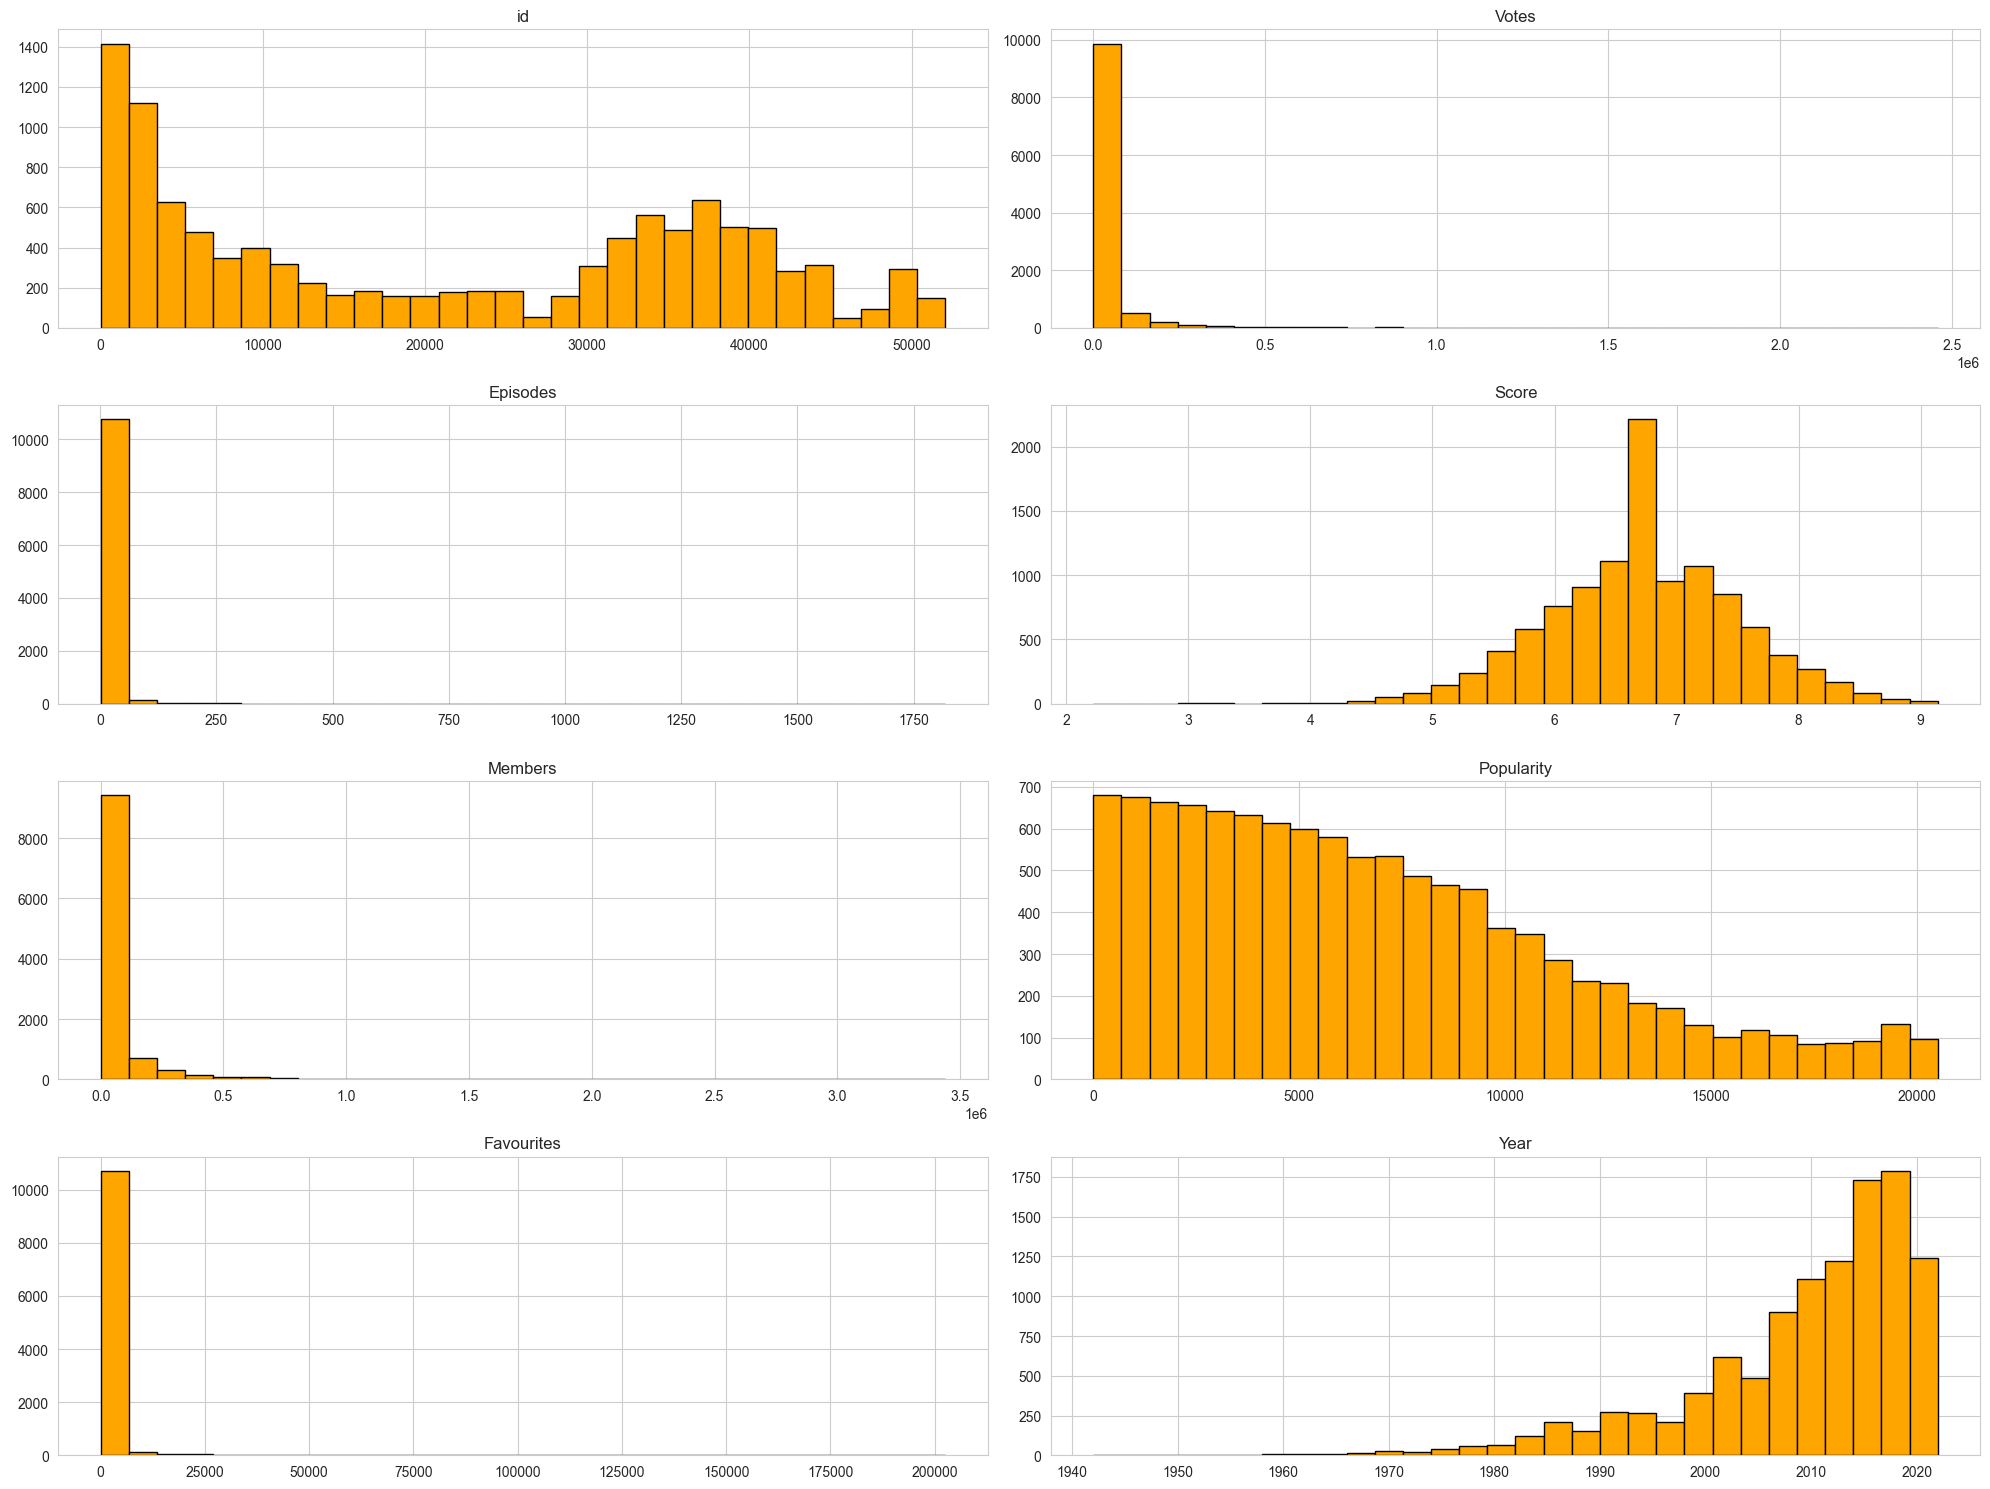

In [53]:
plt.figure(figsize=(20, 15))
numeric_df.hist(bins=30, figsize=(20, 15), layout=(4, 2), color='orange', edgecolor='black')
plt.tight_layout()
plt.show()

In [54]:
print(f"The shape of the dataset before removing the outliers is {df.shape}")
# Removing outliers using IQR method, except for 'Score' column
filtered_cols = numeric_df.columns.difference(['Score'])
Q1 = numeric_df[filtered_cols].quantile(0.25)
Q3 = numeric_df[filtered_cols].quantile(0.75)
IQR_filtered = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR_filtered
upper_bound = Q3 + 1.5 * IQR_filtered

iqr_mask = ~((numeric_df[filtered_cols] < lower_bound) | (numeric_df[filtered_cols] > upper_bound)).any(axis=1)
df = df[iqr_mask]

# Treating outliers in 'Score' column using z-score method
df = df[np.abs(stats.zscore(df['Score'])) <= 3]
print(f"The shape of the dataset after removing the outliers is {df.shape}")

The shape of the dataset before removing the outliers is (10982, 16)
The shape of the dataset after removing the outliers is (7719, 16)


In [55]:
categorical_columns = ['Title', 'Status', 'Types', 'Source', 'Rating', 'Season', 'Genres', 'Studios']
for col in categorical_columns:
    df[col] = df[col].str.title()

# Univariate Analysis
## Key Steps  

### **1. Summary Statistics**  
- **Measures of Central Tendency**: Mean, Median, Mode  
- **Measures of Dispersion**: Variance, Standard Deviation, Range  
- **Shape of Distribution**: Skewness, Kurtosis  

### **2. Frequency Distributions**  
- Analyze categorical variables using frequency tables and bar charts.  
- Identify the most common and least common categories.  

###  **3. Visualization Techniques**  
- **Histograms** – Understand the distribution of numerical variables.  
- **Box Plots** – Detect outliers and analyze data spread.  



                    mean       50%      variance   skewness
id          21071.657075  19583.00  2.733783e+08   0.151232
Votes       37616.707977   3394.50  1.573373e+10   7.901659
Episodes       12.555454      3.00  1.252887e+03  27.367545
Score           6.720879      6.73  5.992254e-01  -0.226433
Members     72218.472865   8958.50  4.249974e+10   6.494500
Popularity   6737.292296   5862.50  2.372206e+07   0.794468
Favourites    850.846385     25.00  3.295984e+07  17.983226
Year         2009.229011   2012.00  1.136207e+02  -1.444389


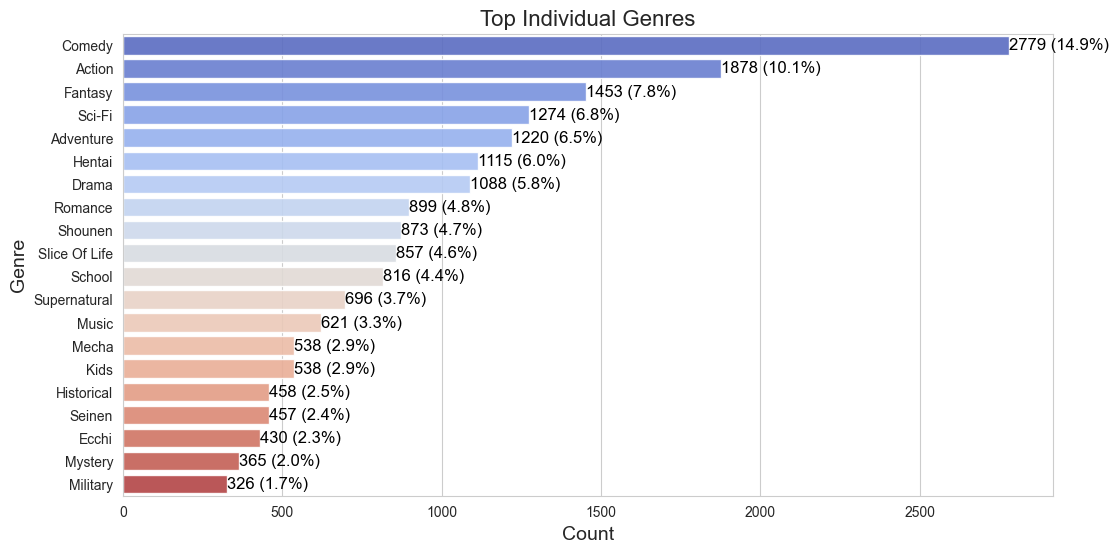

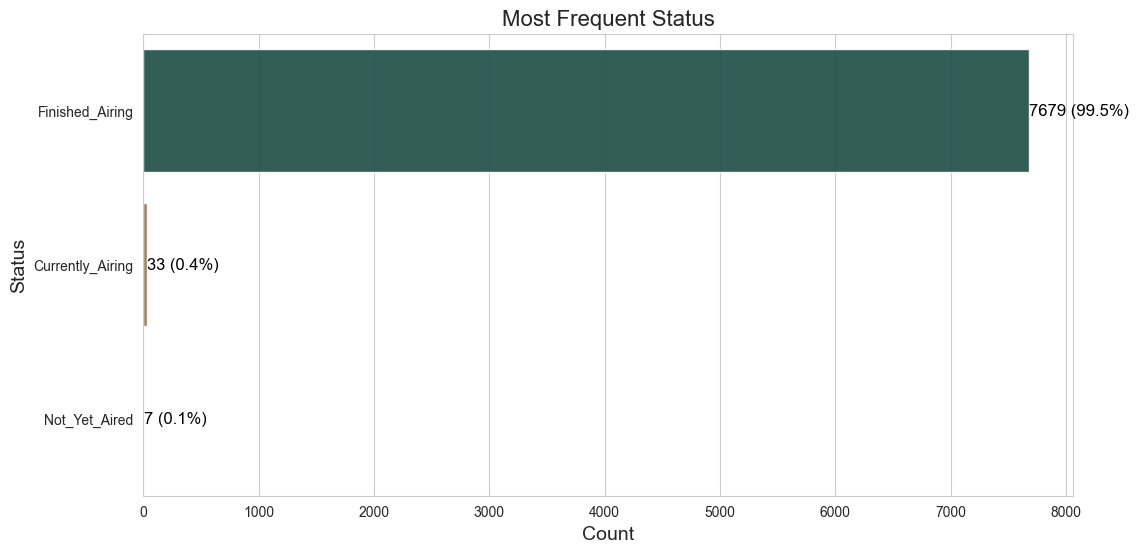

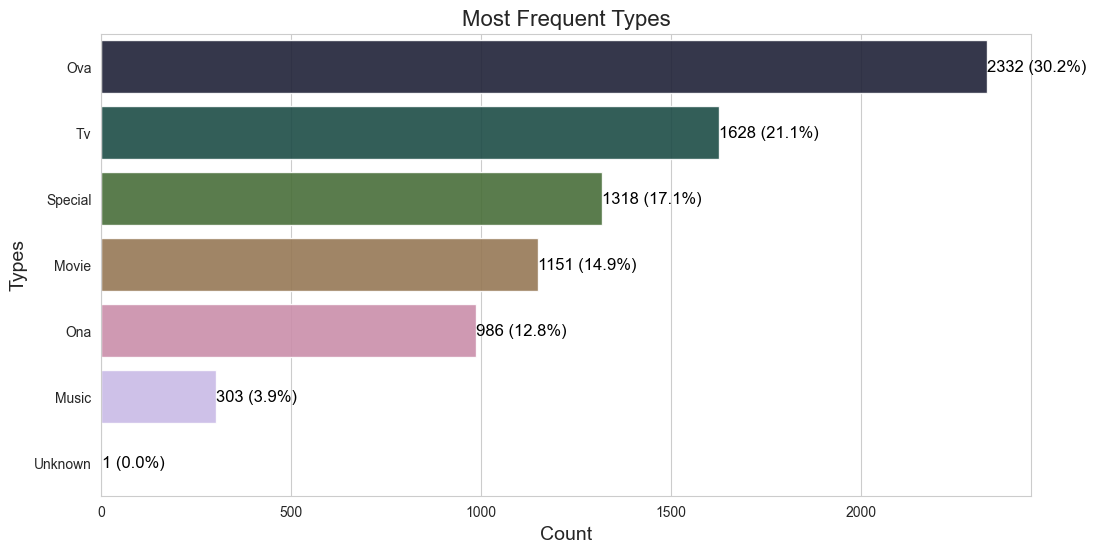

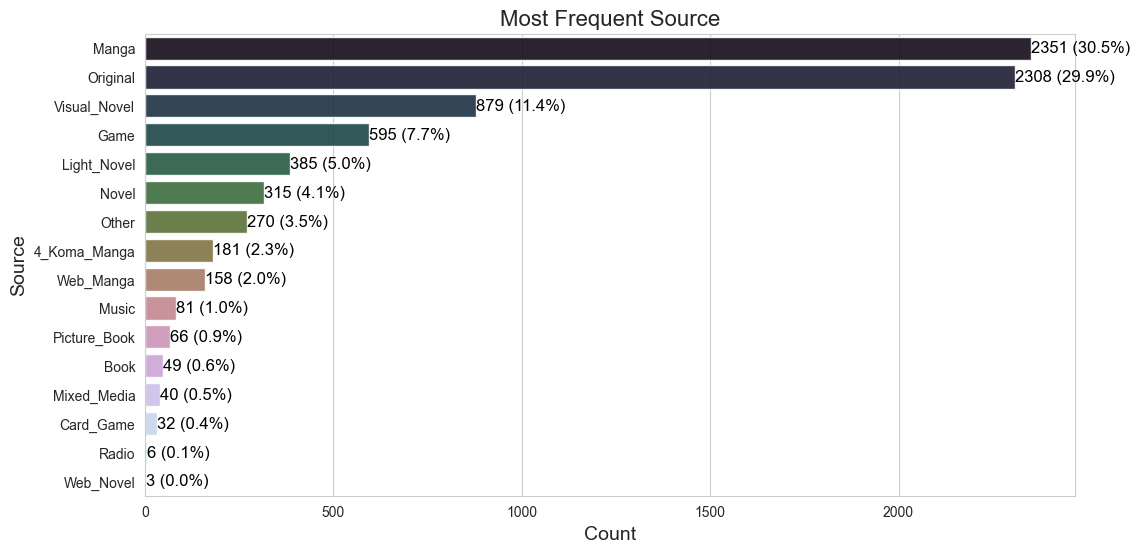

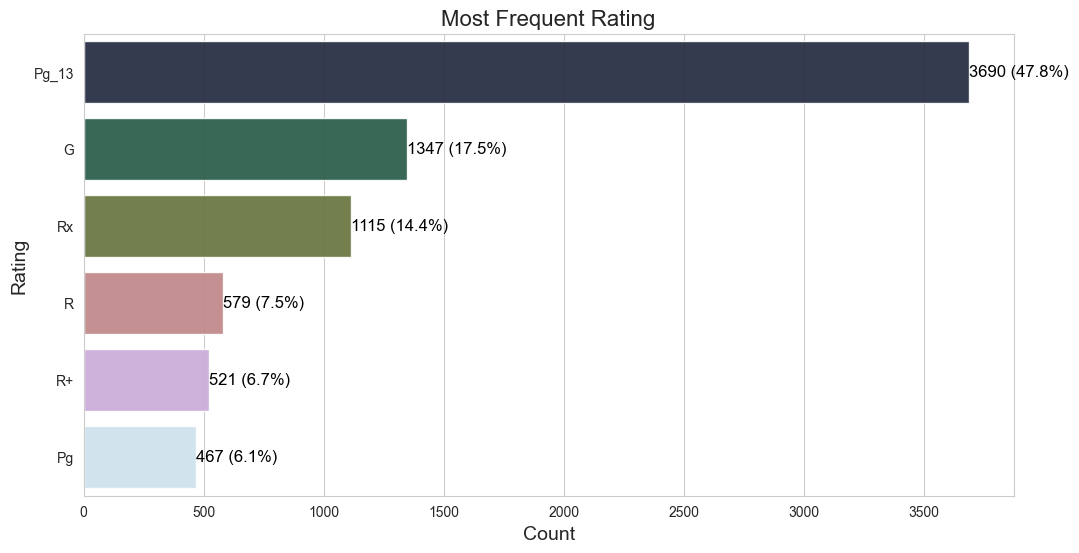

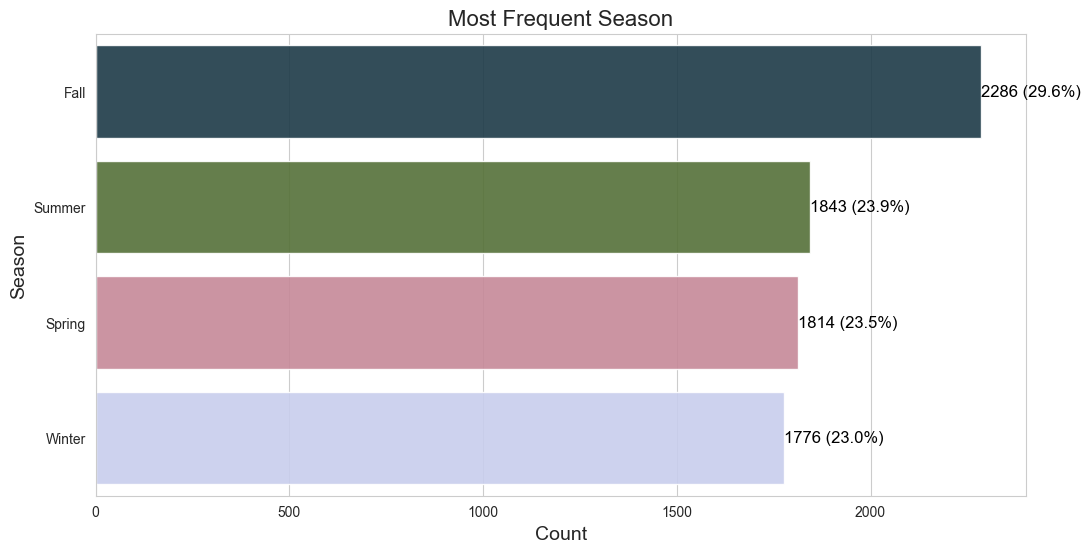

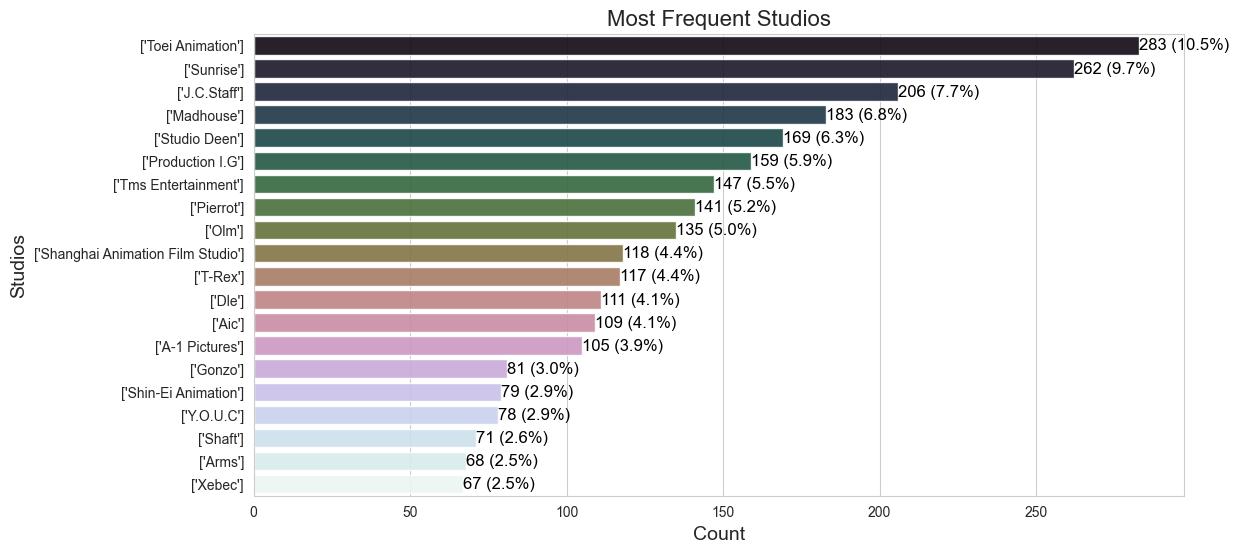

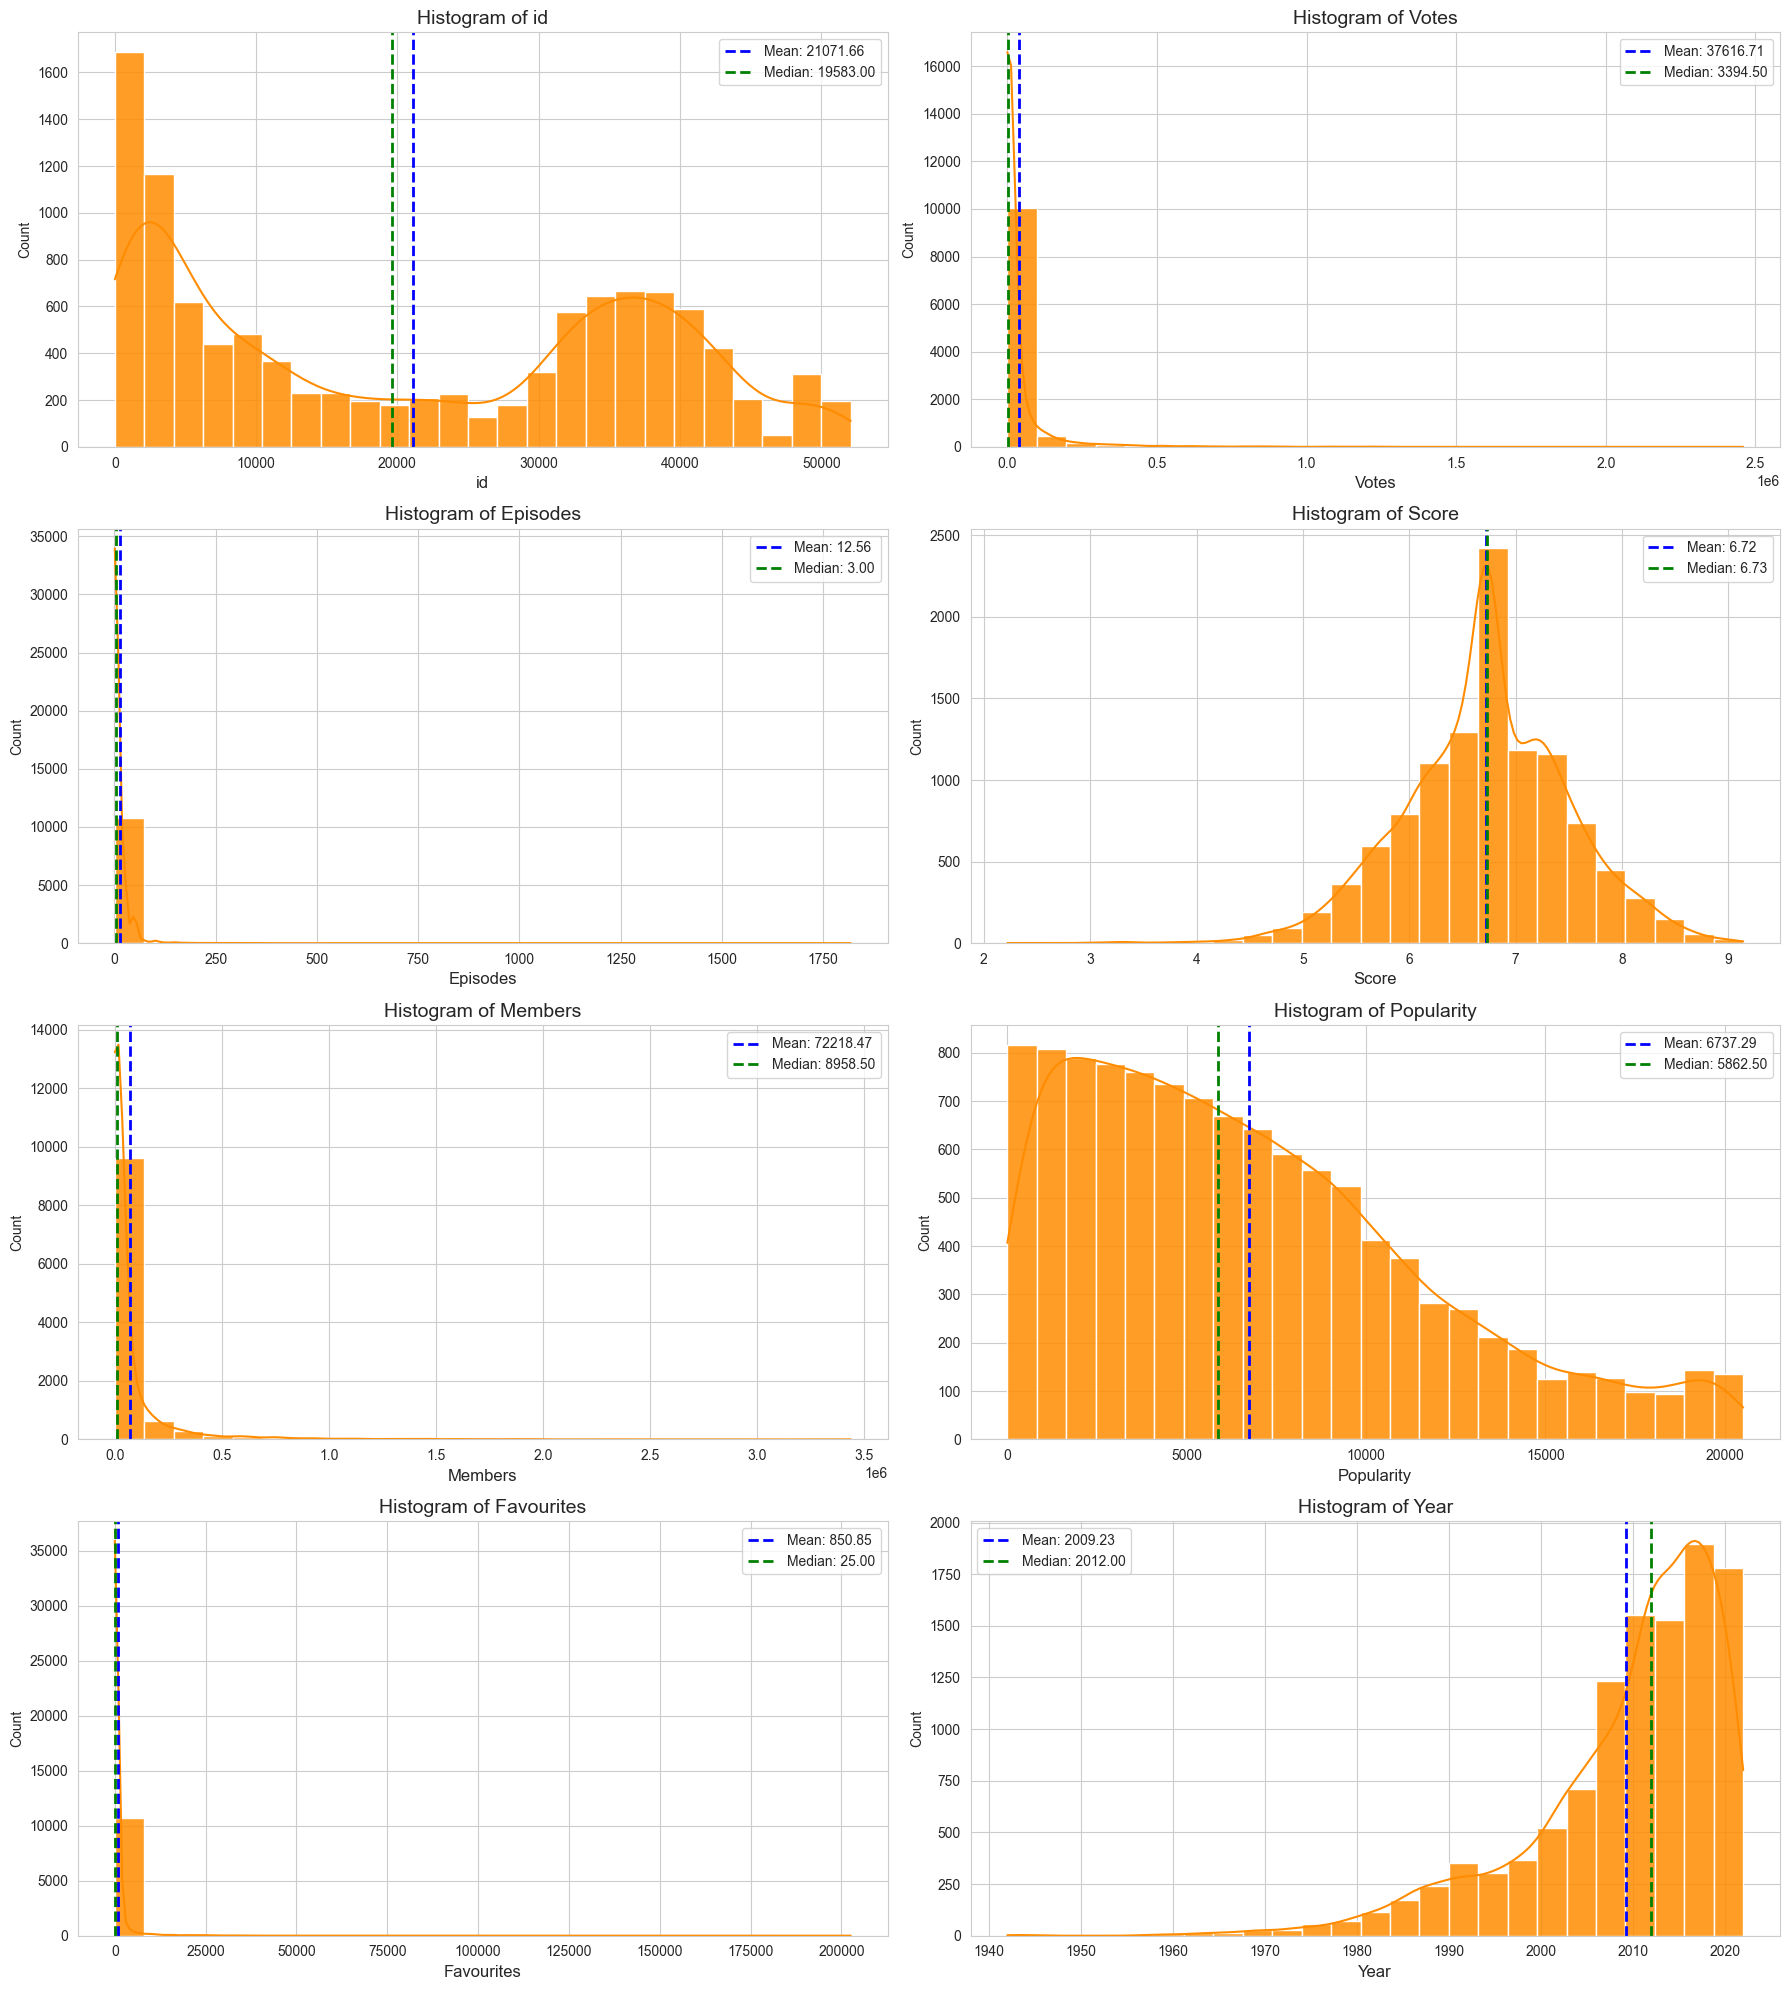

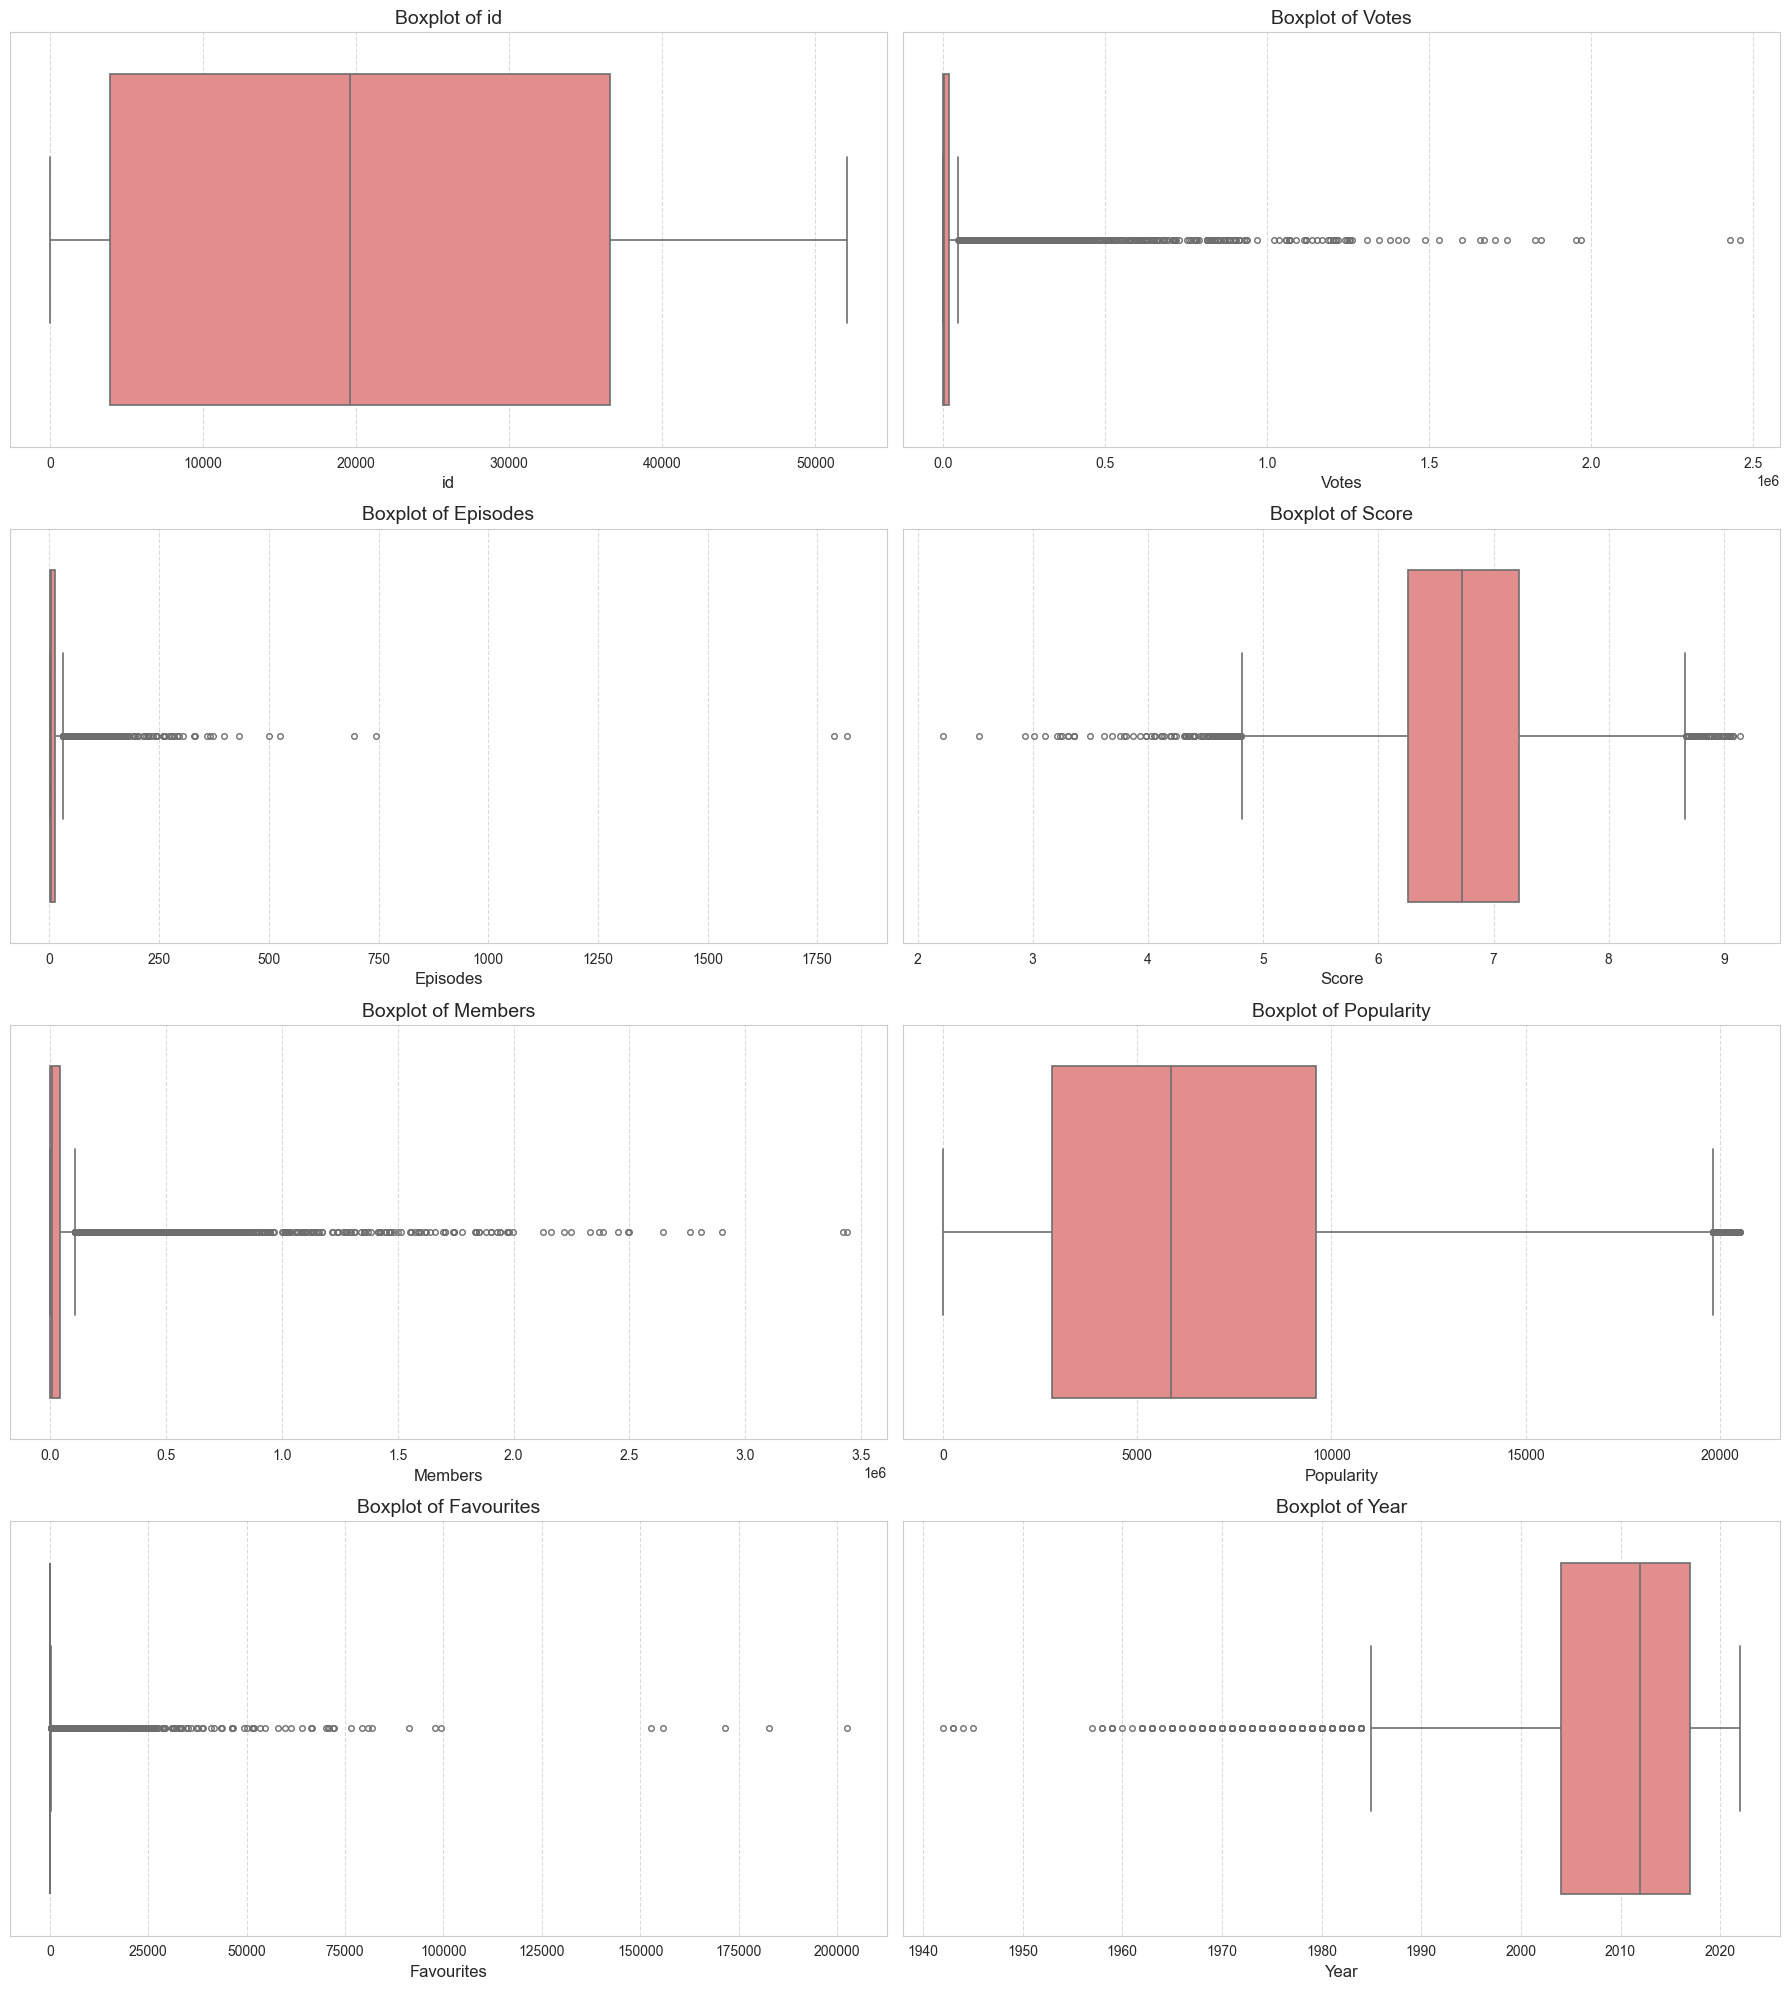

In [56]:
import warnings
import ast
from collections import Counter

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style("whitegrid")

numeric_summary = numeric_df.describe().T.assign(
    variance=numeric_df.var(),
    skewness=numeric_df.skew()
)
print(numeric_summary[['mean', '50%', 'variance', 'skewness']])

genre_counts = Counter()
df['Genres'].dropna().apply(lambda x: genre_counts.update(ast.literal_eval(x)))

genre_series = pd.Series(genre_counts).sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_series.values, y=genre_series.index, palette='coolwarm', alpha=0.9)
plt.title("Top Individual Genres", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Genre", fontsize=14)

total = genre_series.sum()
for p in ax.patches:
    count = int(p.get_width())
    percentage = f"{(count / total) * 100:.1f}%"
    ax.annotate(f"{count} ({percentage})", (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black')
plt.show()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    if col not in ['Title', 'Genres'] and col in df.columns:
        value_counts = df[col].value_counts().head(20)
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette='cubehelix', alpha=0.9)
        plt.title(f"Most Frequent {col}", fontsize=16)
        plt.xlabel("Count", fontsize=14)
        plt.ylabel(col, fontsize=14)
        total = value_counts.sum()
        for p in ax.patches:
            count = int(p.get_width())
            percentage = f"{(count / total) * 100:.1f}%"
            ax.annotate(f"{count} ({percentage})", (p.get_width(), p.get_y() + p.get_height() / 2), 
                        ha='left', va='center', fontsize=12, color='black')
        plt.show()

num_cols = len(numeric_df.columns)
rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(rows, 2, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[col], bins=25, kde=True, ax=axes[i], color='darkorange', alpha=0.85)
    axes[i].axvline(numeric_df[col].mean(), color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {numeric_df[col].mean():.2f}")
    axes[i].axvline(numeric_df[col].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {numeric_df[col].median():.2f}")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f"Histogram of {col}", fontsize=14)
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(rows, 2, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i], color='lightcoral', fliersize=4, linewidth=1.2)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Bivariate Analysis  
Bivariate analysis explores the relationship between two variables to uncover patterns, dependencies, and trends. This helps in understanding how one variable influences another.  

## Key Techniques  
### **1. Correlation Analysis**  
- Calculate correlation coefficients to measure the strength and direction of relationships between numerical variables.  
- Use a **correlation heatmap** to visualize these relationships effectively.  

### **2. Analyzing Relationships Between Continuous Variables**  
- **Scatter Plots** – Illustrate trends, clusters, and strength of associations between two numerical variables.  
- **Regression Lines** – Add trend lines to observe linear or non-linear relationships.  

### **3. Comparing Categorical and Numerical Variables**  
- **Bar Charts** – Compare distributions, averages, or frequencies across different categories.  
- **Violin Plots** – Show data density, variability, and distribution across groups.  
- **Box Plots** – Identify outliers, median values, and spread of data within different categories.  

These techniques provide insights into data relationships and help in statistical analysis and predictive modeling.

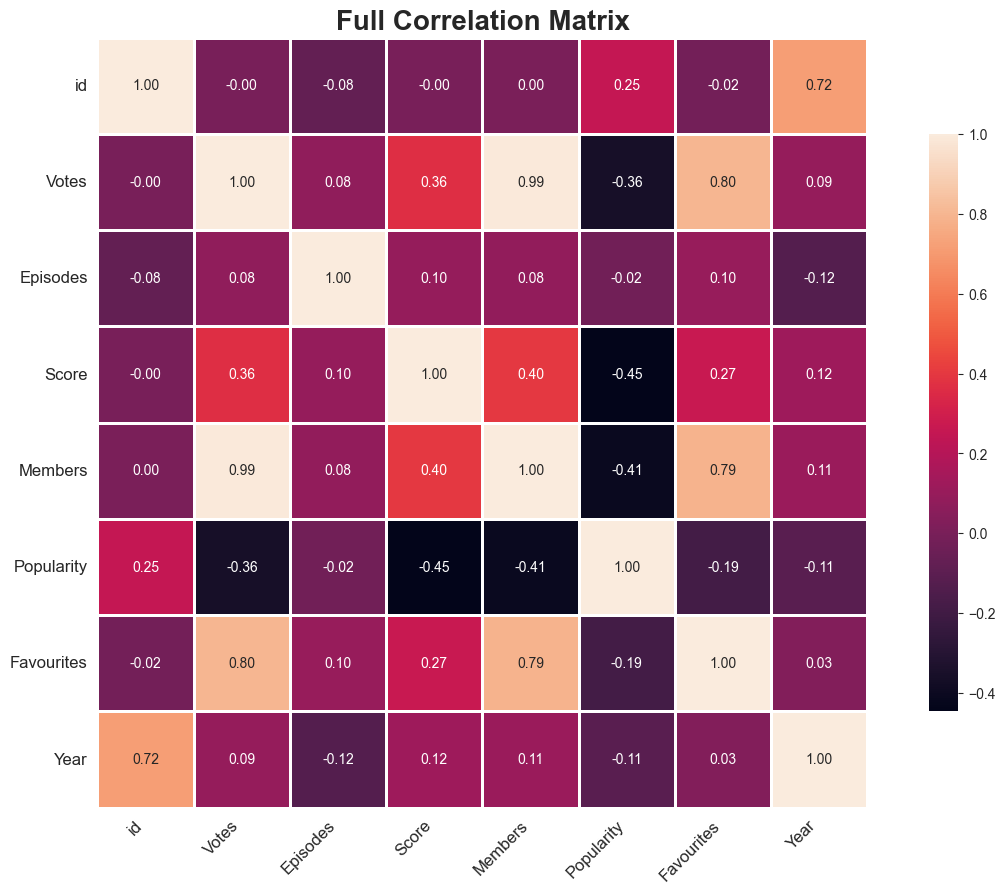

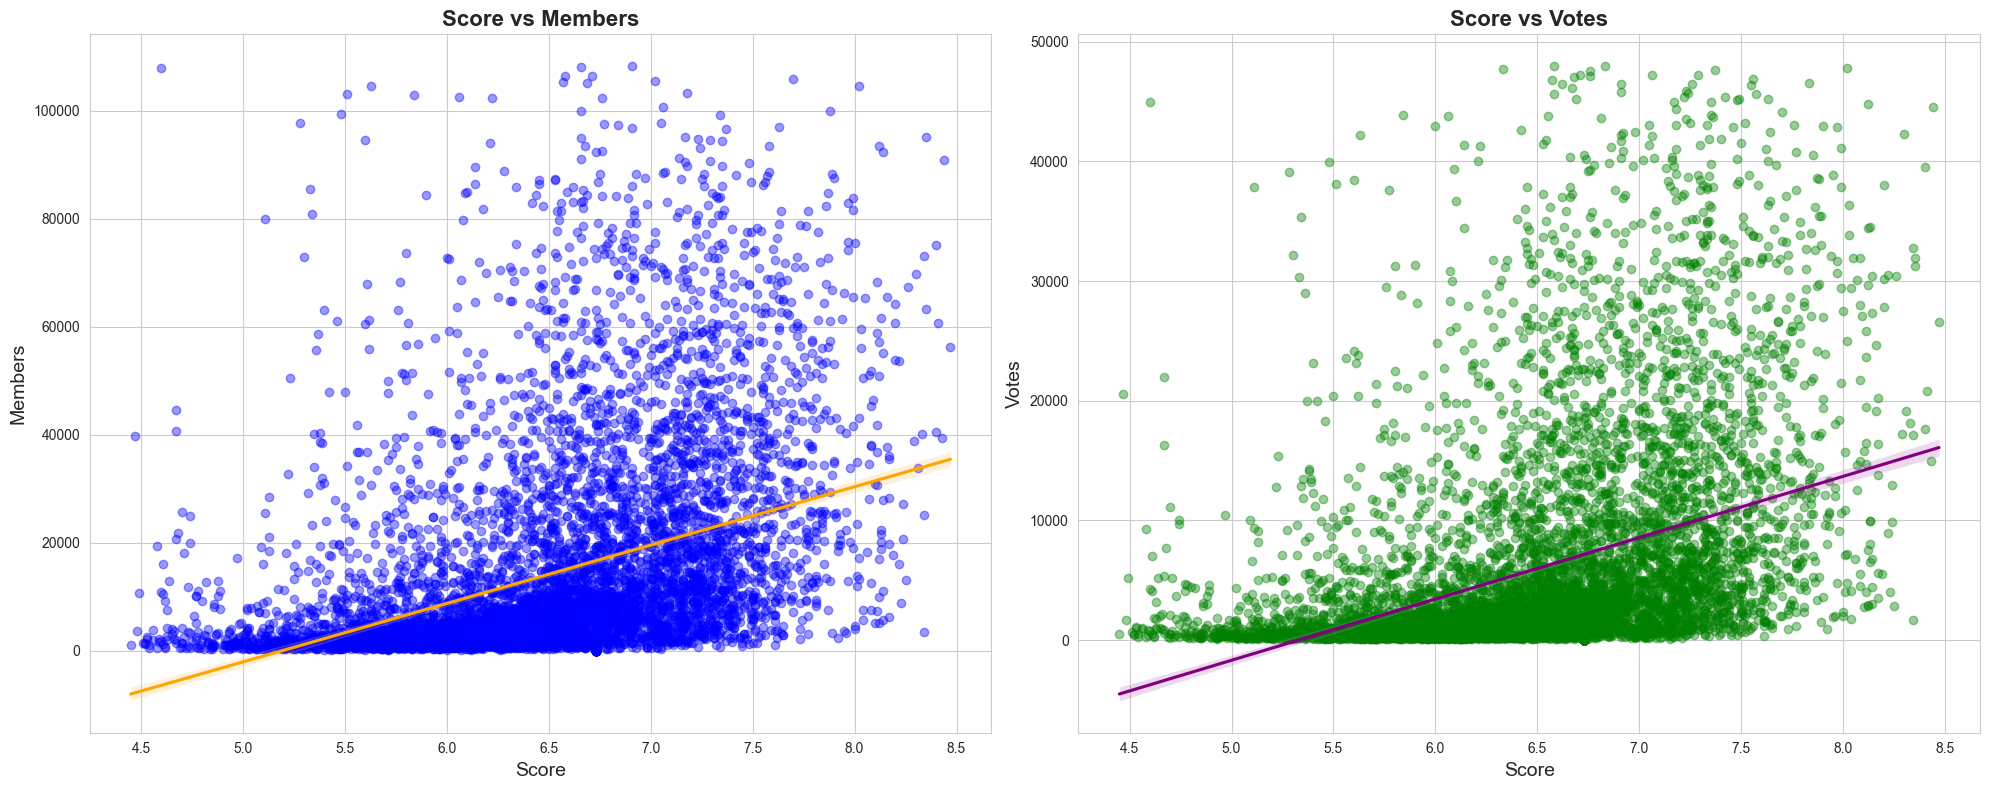

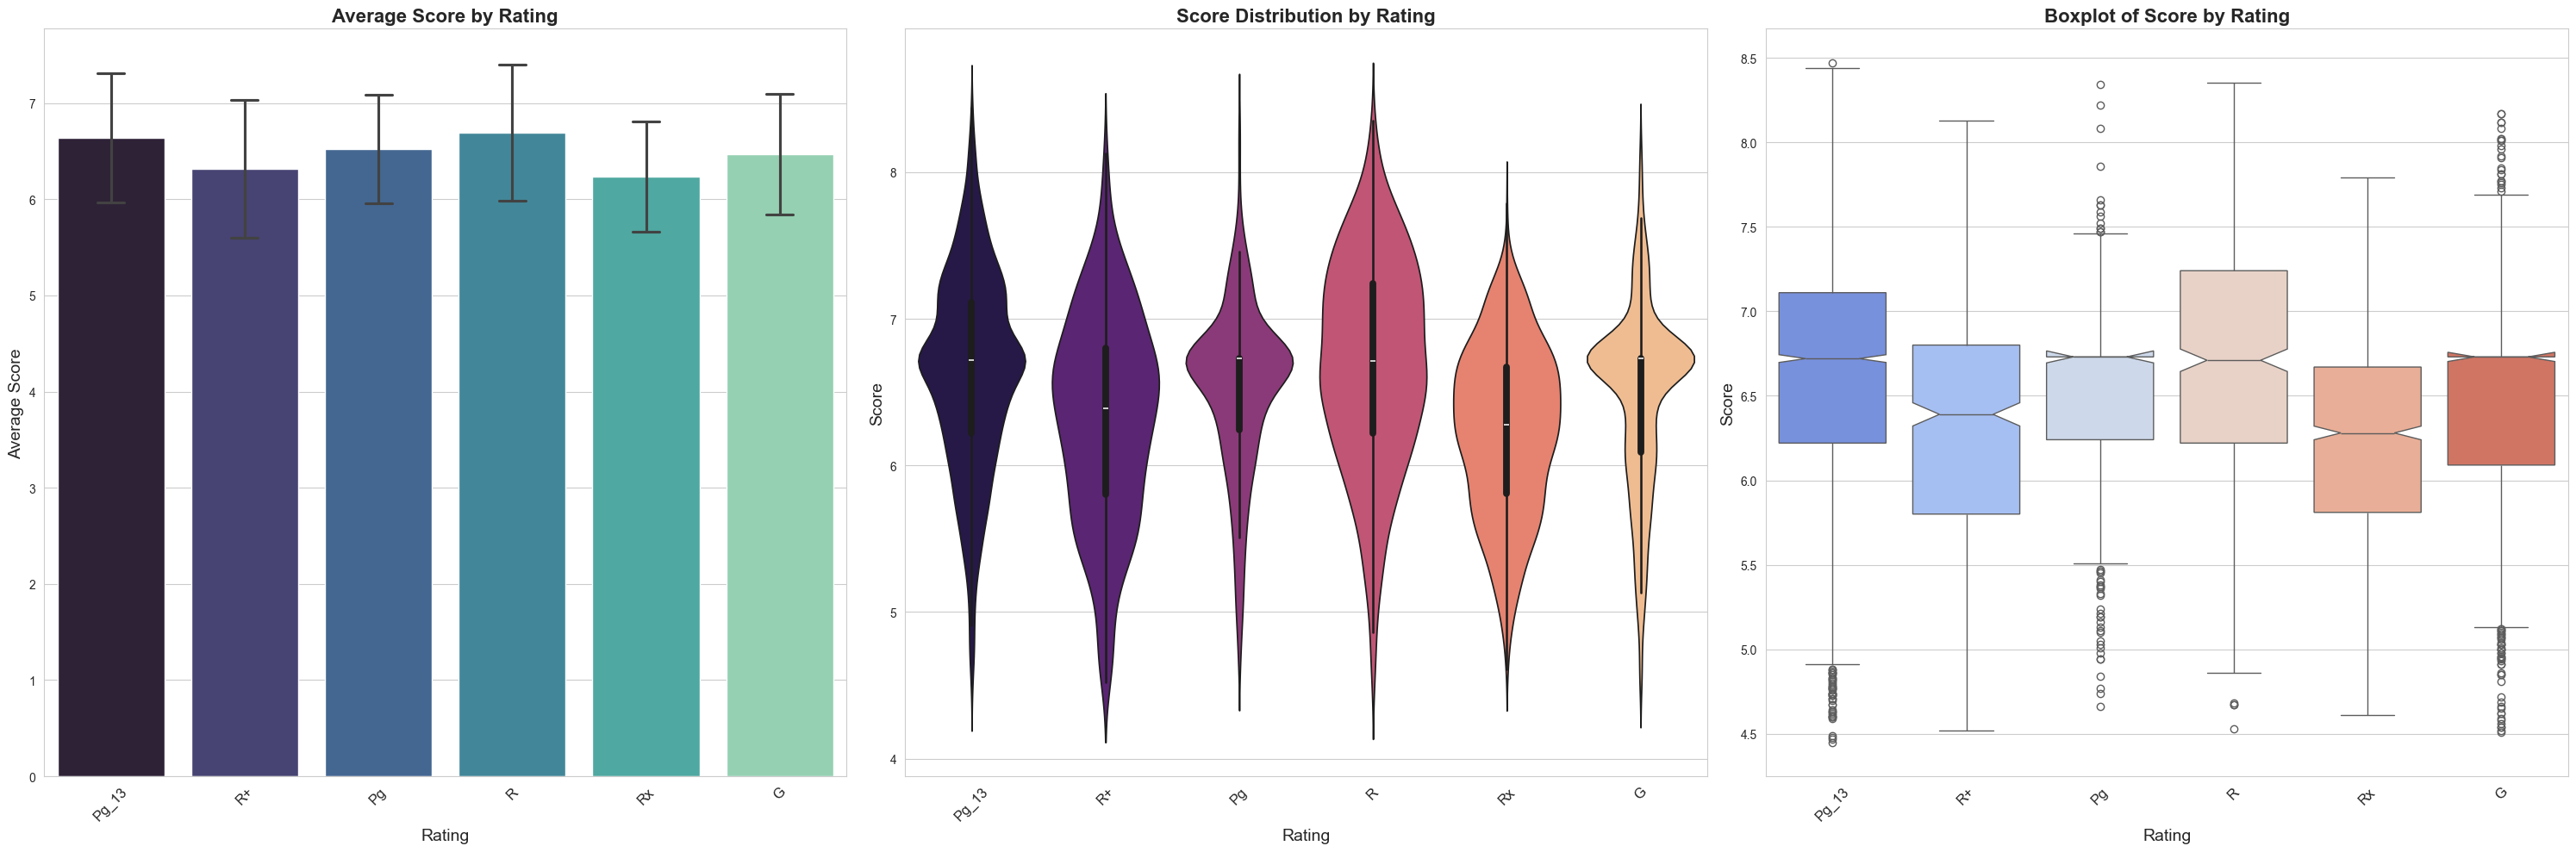

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import numpy as np
from collections import Counter

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style("whitegrid")

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='rocket', linewidths=0.75, square=True,
            cbar_kws={"shrink": 0.75})
plt.title("Full Correlation Matrix", fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.regplot(x='Score', y='Members', data=df.dropna(subset=['Score', 'Members']), ax=axes[0], scatter_kws={'alpha': 0.4, 'color': 'blue'}, line_kws={"color": "orange"})
axes[0].set_title("Score vs Members", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Score", fontsize=14)
axes[0].set_ylabel("Members", fontsize=14)

sns.regplot(x='Score', y='Votes', data=df.dropna(subset=['Score', 'Votes']), ax=axes[1], scatter_kws={'alpha': 0.4, 'color': 'green'}, line_kws={"color": "purple"})
axes[1].set_title("Score vs Votes", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Score", fontsize=14)
axes[1].set_ylabel("Votes", fontsize=14)

plt.tight_layout()
plt.show()

top_ratings = df['Rating'].value_counts().index[:10]
df_filtered = df[df['Rating'].isin(top_ratings)]

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
sns.barplot(x='Rating', y='Score', data=df_filtered, ax=axes[0], estimator=np.mean, ci="sd", palette='mako', capsize=0.2)
axes[0].set_title("Average Score by Rating", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Rating", fontsize=14)
axes[0].set_ylabel("Average Score", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

sns.violinplot(x='Rating', y='Score', data=df_filtered, ax=axes[1], palette='magma', inner="box", scale="count")
axes[1].set_title("Score Distribution by Rating", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Rating", fontsize=14)
axes[1].set_ylabel("Score", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)

sns.boxplot(x='Rating', y='Score', data=df_filtered, ax=axes[2], palette='coolwarm', notch=True)
axes[2].set_title("Boxplot of Score by Rating", fontsize=16, fontweight='bold')
axes[2].set_xlabel("Rating", fontsize=14)
axes[2].set_ylabel("Score", fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()


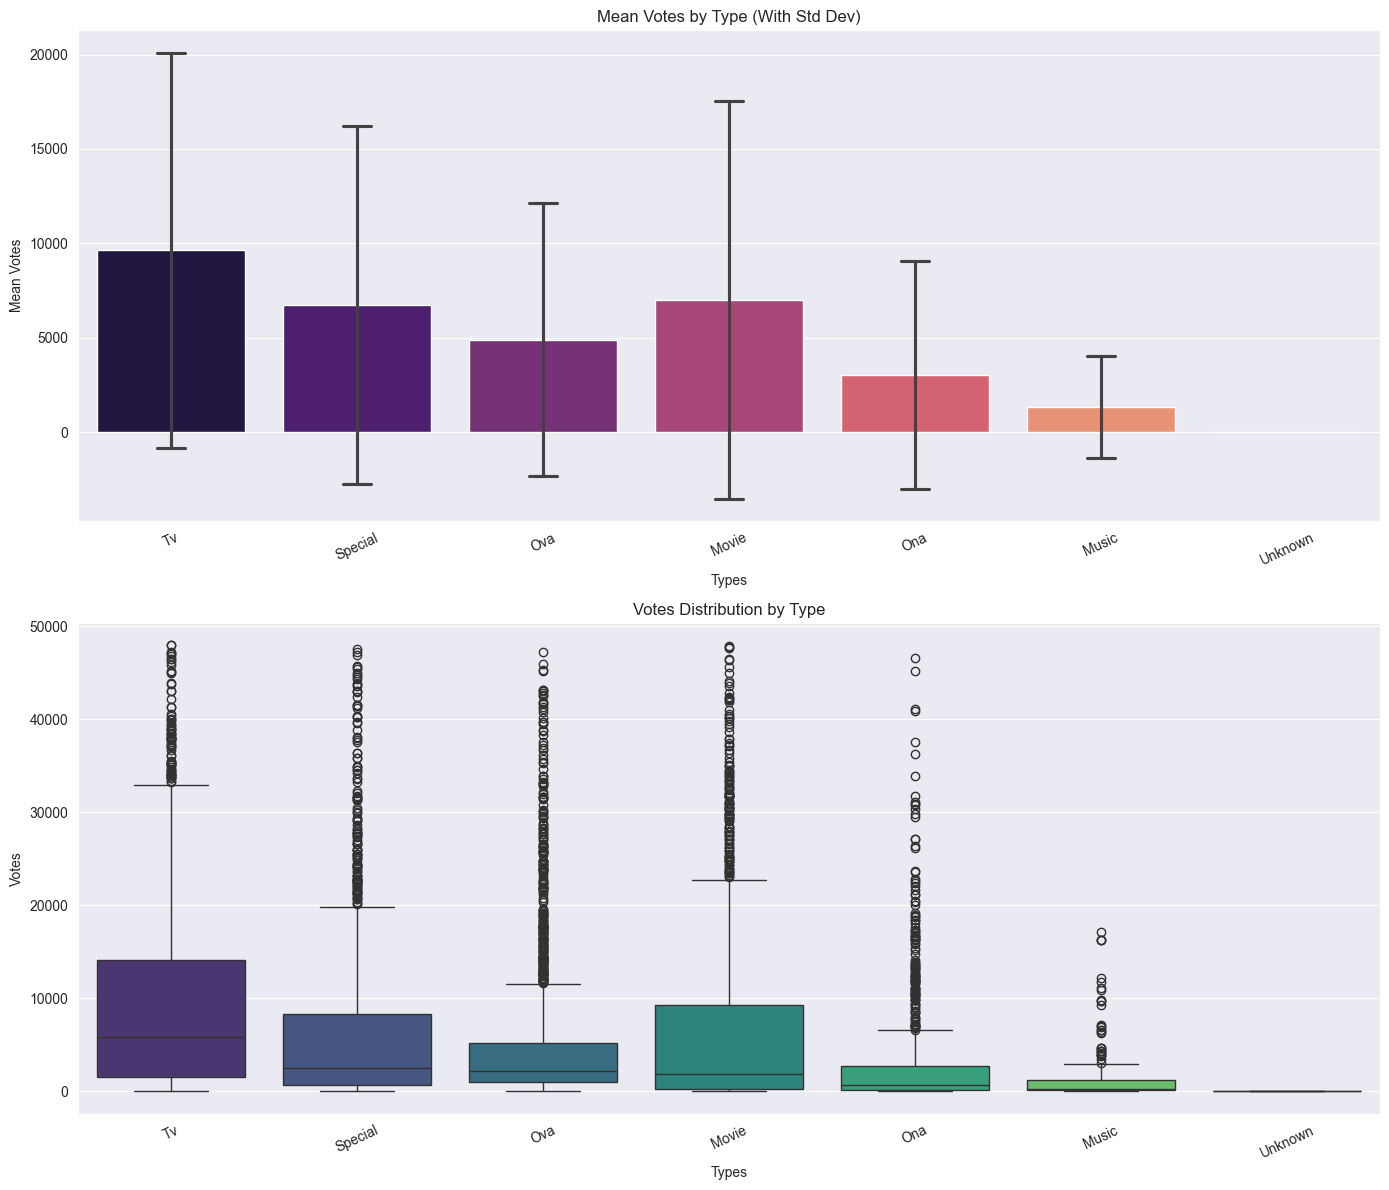

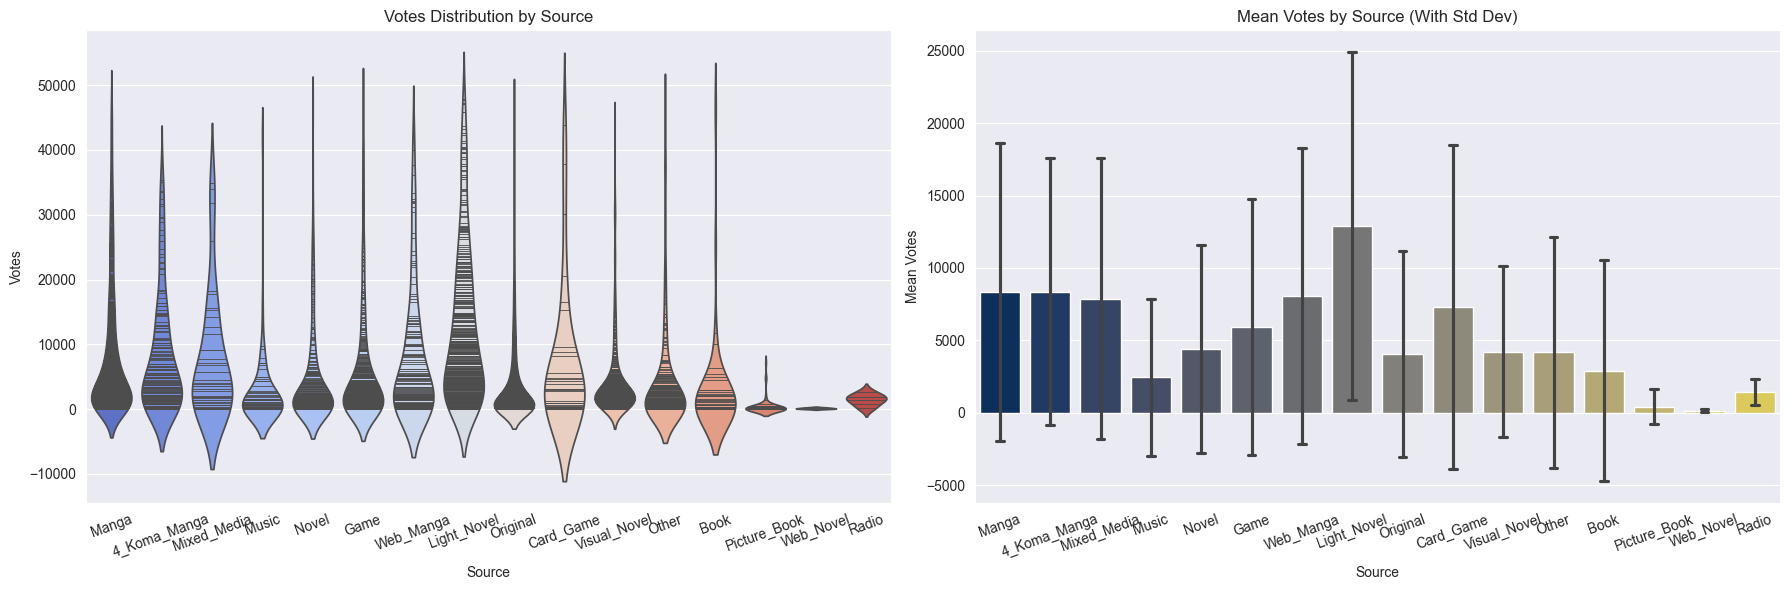

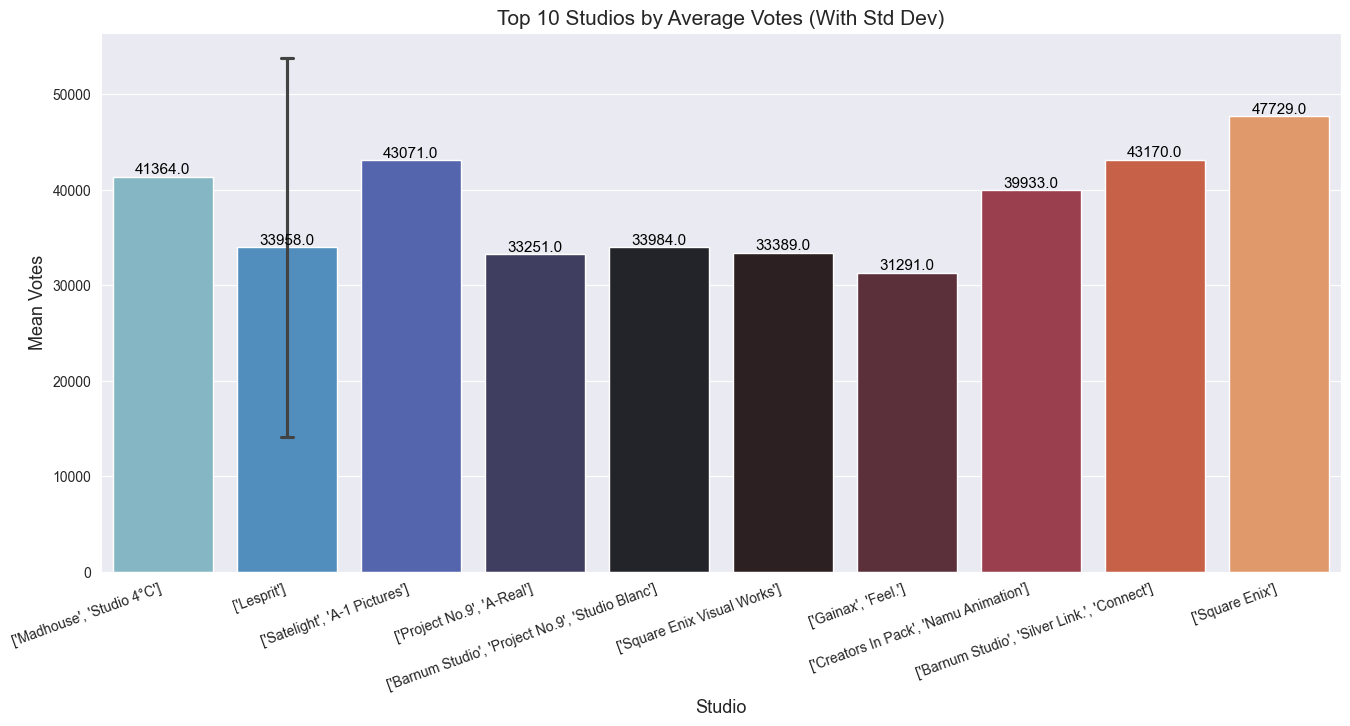

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a different Seaborn style
sns.set_style("darkgrid")

### === 1. Votes vs Type ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))  # Changed layout to vertical

# Barplot: Mean votes per type with standard deviation
sns.barplot(data=df, x='Types', y='Votes', ax=axes[0], palette='magma', estimator=np.mean, ci="sd", capsize=0.15)
axes[0].set(title="Mean Votes by Type (With Std Dev)", xlabel="Types", ylabel="Mean Votes")
axes[0].tick_params(axis='x', rotation=25)

# Boxplot: Distribution of votes by type
sns.boxplot(data=df, x='Types', y='Votes', ax=axes[1], palette='viridis', showfliers=True)  # Show outliers
axes[1].set(title="Votes Distribution by Type", xlabel="Types", ylabel="Votes")
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()


### === 2. Votes vs Source ===
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))  # Adjusted width for better visualization

# Violin Plot: Distribution of votes by source
sns.violinplot(data=df, x='Source', y='Votes', ax=axes[0], palette='coolwarm', inner="stick")  # Inner changed to 'stick'
axes[0].set(title="Votes Distribution by Source", xlabel="Source", ylabel="Votes")
axes[0].tick_params(axis='x', rotation=20)

# Barplot: Mean votes by source
sns.barplot(data=df, x='Source', y='Votes', ax=axes[1], palette='cividis', estimator=np.mean, ci="sd", capsize=0.15)
axes[1].set(title="Mean Votes by Source (With Std Dev)", xlabel="Source", ylabel="Mean Votes")
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


### === 3. Votes vs Studio ===
# Select Top 10 Studios by Average Votes
top_studios = df.groupby("Studios")["Votes"].mean().nlargest(10).index
df_filtered = df[df["Studios"].isin(top_studios)]

plt.figure(figsize=(16, 7))  # Adjusted width-height ratio
ax = sns.barplot(data=df_filtered, x="Studios", y="Votes", palette="icefire", estimator=np.mean, ci="sd", capsize=0.1)
plt.title("Top 10 Studios by Average Votes (With Std Dev)", fontsize=15)
plt.xlabel("Studio", fontsize=13)
plt.ylabel("Mean Votes", fontsize=13)
plt.xticks(rotation=20, ha="right")

# Annotate bars with precise vote values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha="center", va="bottom", fontsize=11, color="black")

plt.show()


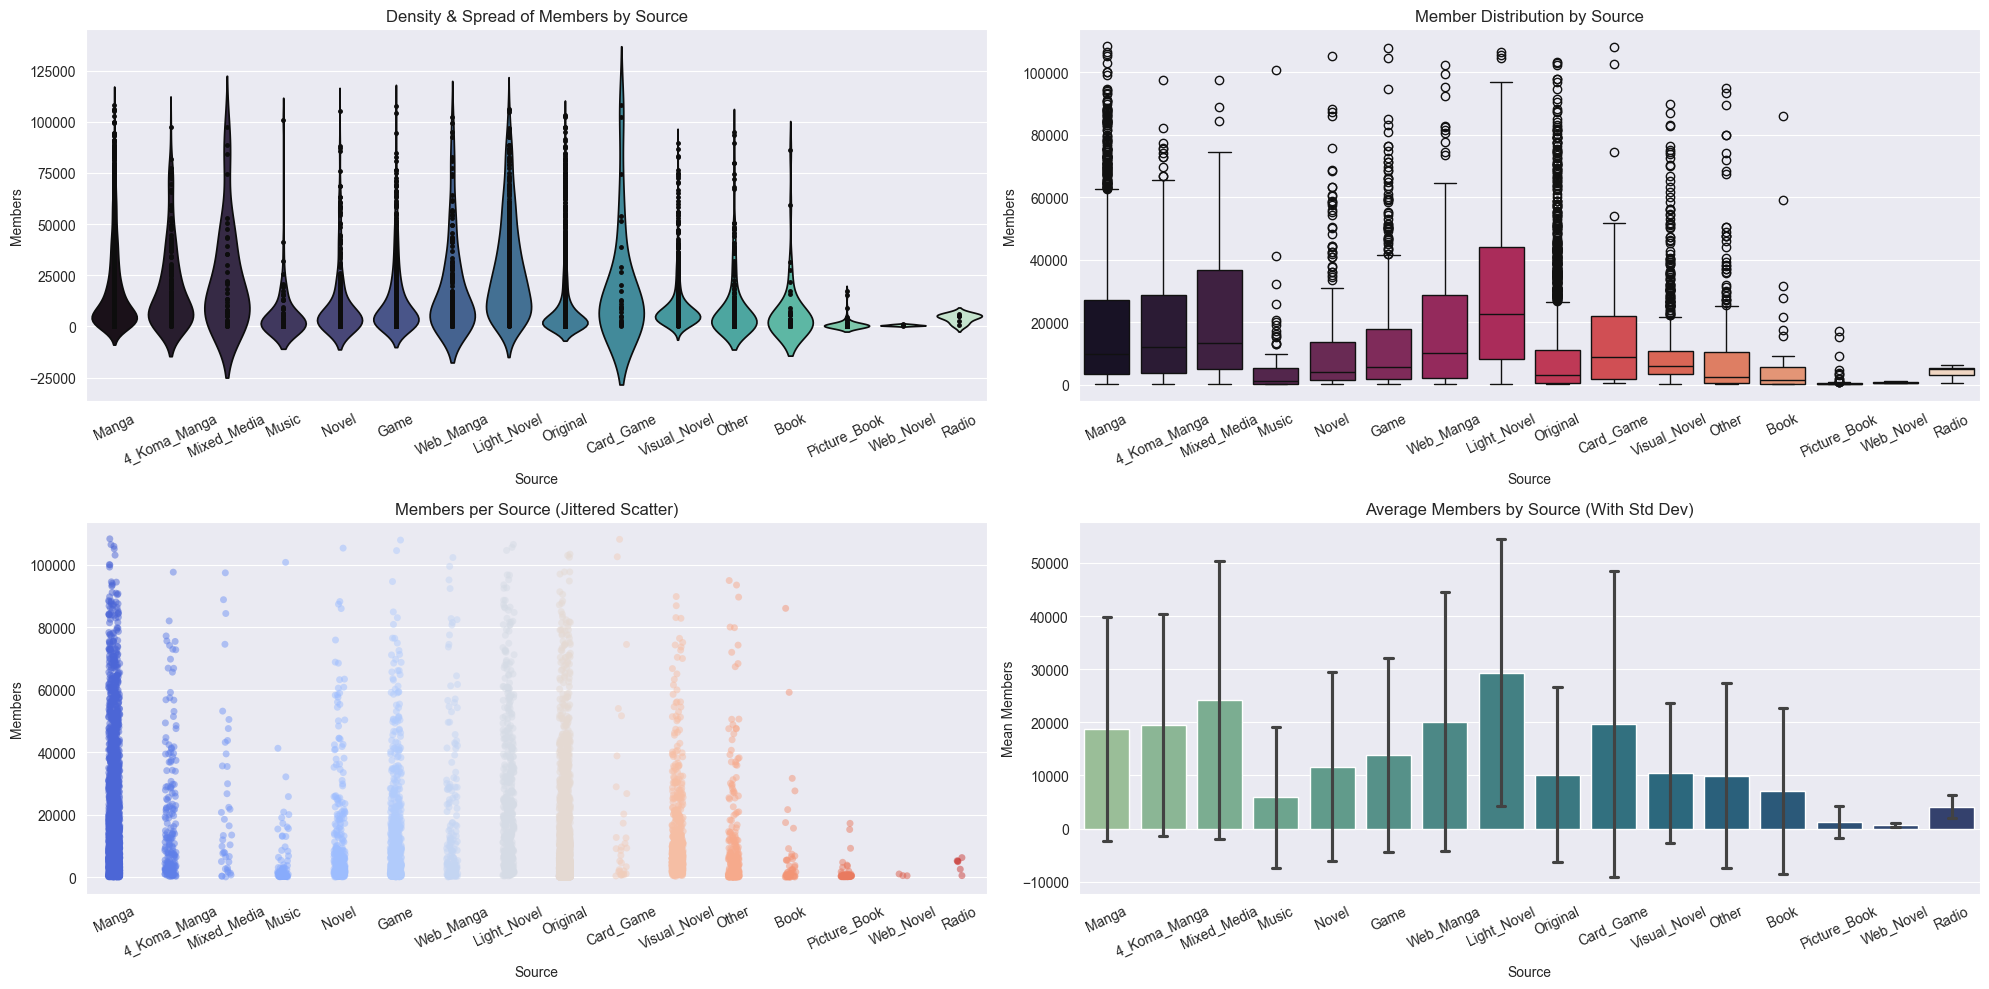

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a different Seaborn style
sns.set_style("darkgrid")

### === Members vs Source ===
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))  # Changed dimensions

# 1. Violin Plot: Density of Members per Source (moved first)
sns.violinplot(data=df, x='Source', y='Members', ax=axes[0, 0], palette='mako', inner="point")  # Changed to 'point'
axes[0, 0].set(title="Density & Spread of Members by Source", xlabel="Source", ylabel="Members")
axes[0, 0].tick_params(axis='x', rotation=25)

# 2. Boxplot: Distribution of Members by Source
sns.boxplot(data=df, x='Source', y='Members', ax=axes[0, 1], palette='rocket', showfliers=True)  # Show outliers
axes[0, 1].set(title="Member Distribution by Source", xlabel="Source", ylabel="Members")
axes[0, 1].tick_params(axis='x', rotation=25)

# 3. Strip Plot: Individual Data Points (Moved to bottom-left, adjusted opacity)
sns.stripplot(data=df, x='Source', y='Members', ax=axes[1, 0], palette='coolwarm', jitter=True, alpha=0.5, size=5)
axes[1, 0].set(title="Members per Source (Jittered Scatter)", xlabel="Source", ylabel="Members")
axes[1, 0].tick_params(axis='x', rotation=25)

# 4. Bar Plot: Mean & Standard Deviation of Members per Source (last position)
sns.barplot(data=df, x='Source', y='Members', ax=axes[1, 1], palette='crest', estimator=np.mean, ci="sd", capsize=0.15)
axes[1, 1].set(title="Average Members by Source (With Std Dev)", xlabel="Source", ylabel="Mean Members")
axes[1, 1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()


# Multivariate Analysis (Exploring Multiple Variables)   
Multivariate analysis investigates how multiple variables interact simultaneously, revealing complex relationships and deeper insights within the data.  

## Key Techniques  

### **1. Pairwise Relationships**  
- **Pair Plots** – Visualize relationships between multiple numerical variables in a grid format.  
- **Scatter Matrix** – Identify trends, clusters, and potential correlations across variables.  

### **2. Correlation Heatmaps**  
- Display relationships between variables using a **heatmap**, where colors indicate the strength and direction of correlations.  

### **3. Grouped Comparisons & Feature Interactions**  
- **Stacked & Grouped Bar Charts** – Compare numerical values across different categorical groups.  
- **Box Plots & Violin Plots** – Showcase data distributions and variations across multiple categories.  
- **Multivariate Regression Models** – Assess the combined influence of multiple predictors on a target variable.  

By analyzing multiple variables together, we gain a more comprehensive understanding of patterns and dependencies within the dataset.

<Figure size 1200x1000 with 0 Axes>

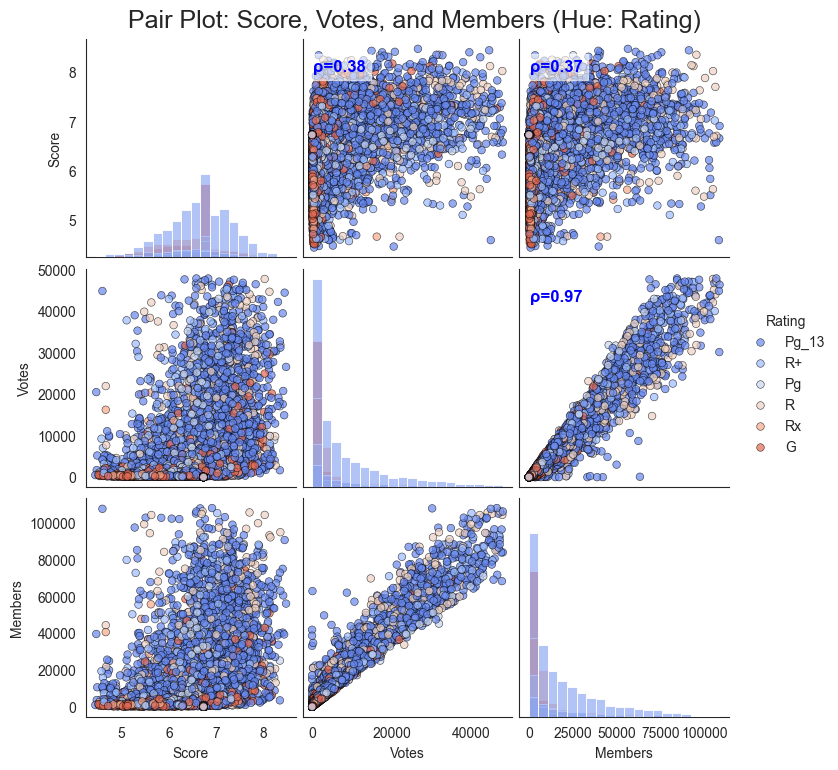

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a different Seaborn style
sns.set_style("white")

# Define numerical features for the pair plot
features = ['Score', 'Votes', 'Members']

# Define categorical variable for hue
hue_var = "Rating"  # Modify to 'Types' if needed

# Compute correlation matrix
corr_matrix = df[features].corr()

# Create a Pair Plot with modified aesthetics
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(data=df, vars=features, hue=hue_var, palette="coolwarm",
                         diag_kind='hist', plot_kws={'alpha': 0.7, 's': 30, 'edgecolor': 'black'},
                         diag_kws={'color': 'gray', 'bins': 20})

# Overlay correlation coefficients on the upper triangle
for i, x_var in enumerate(features):
    for j, y_var in enumerate(features):
        if i < j:  # Upper triangle only
            ax = pair_plot.axes[i, j]
            corr_val = corr_matrix.loc[x_var, y_var]
            ax.text(0.05, 0.85, f"ρ={corr_val:.2f}", transform=ax.transAxes,
                    fontsize=12, fontweight='bold', color='blue', bbox=dict(facecolor='white', alpha=0.6))

# Adjust title positioning
plt.suptitle("Pair Plot: Score, Votes, and Members (Hue: Rating)", fontsize=18, y=1.02)
plt.show()


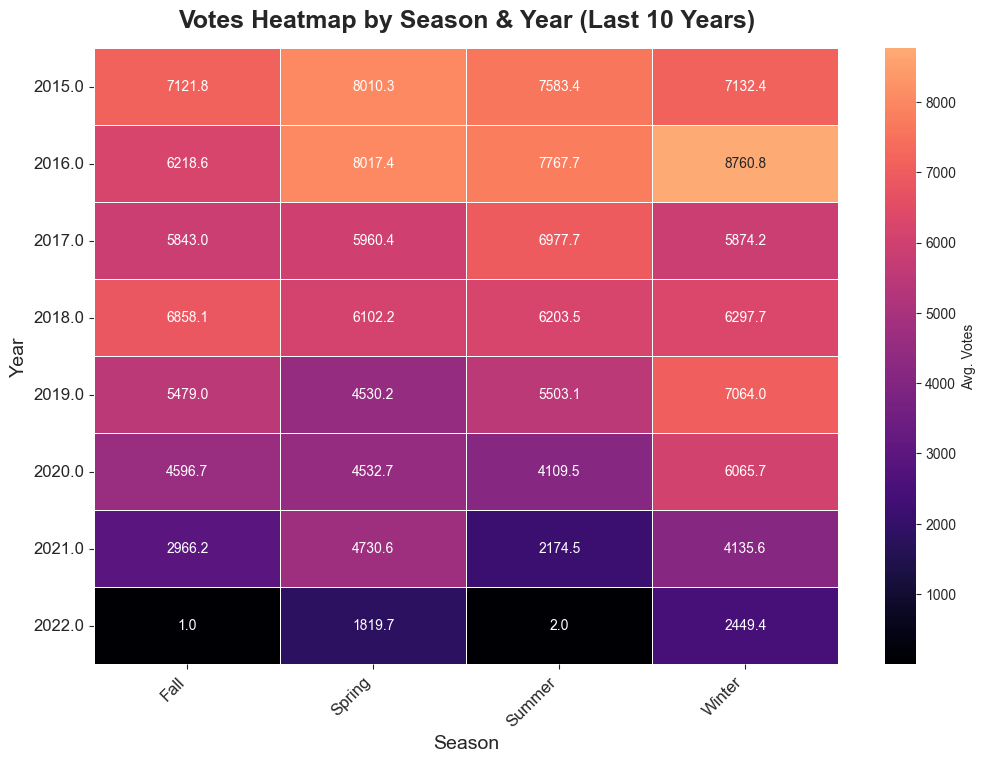

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a clean Seaborn style
sns.set_style("ticks")

# Define the last 10 years dynamically (assuming current year is 2025)
year_now = 2025
years_range = list(range(year_now - 10, year_now))

# Filter data for the last 10 years and remove rows with missing values
df_filtered = df.dropna(subset=["Year", "Season", "Votes"])
df_filtered = df_filtered[df_filtered["Year"].isin(years_range)]

# Create a pivot table with Seasons as columns, Years as rows, and average Votes as values
heatmap_data = df_filtered.pivot_table(index="Year", columns="Season", values="Votes", aggfunc="mean")

# Plot the heatmap with a refined color scheme and clearer annotations
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="magma", annot=True, fmt=".1f", linewidths=0.7, 
            cbar_kws={"label": "Avg. Votes"}, center=heatmap_data.mean().mean())

# Formatting and readability improvements
plt.title("Votes Heatmap by Season & Year (Last 10 Years)", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.grid(False)  # Remove the default grid for a cleaner look

plt.show()


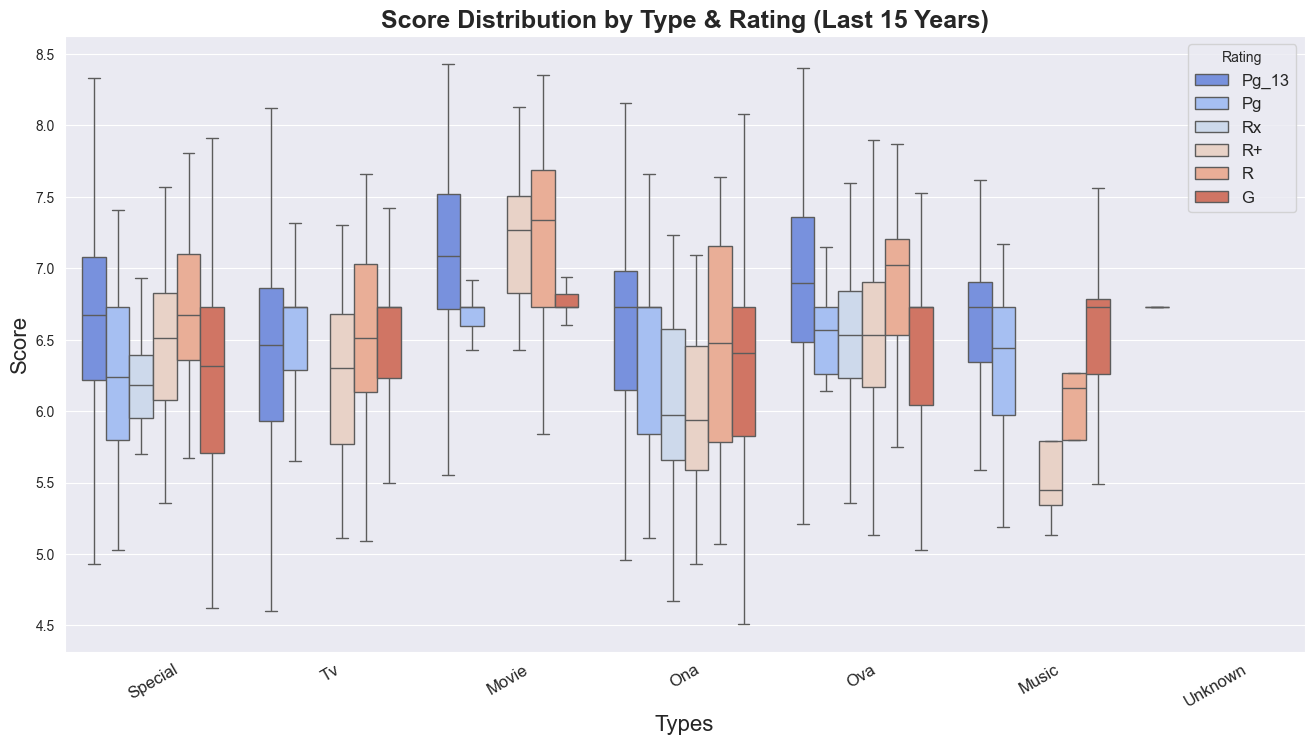

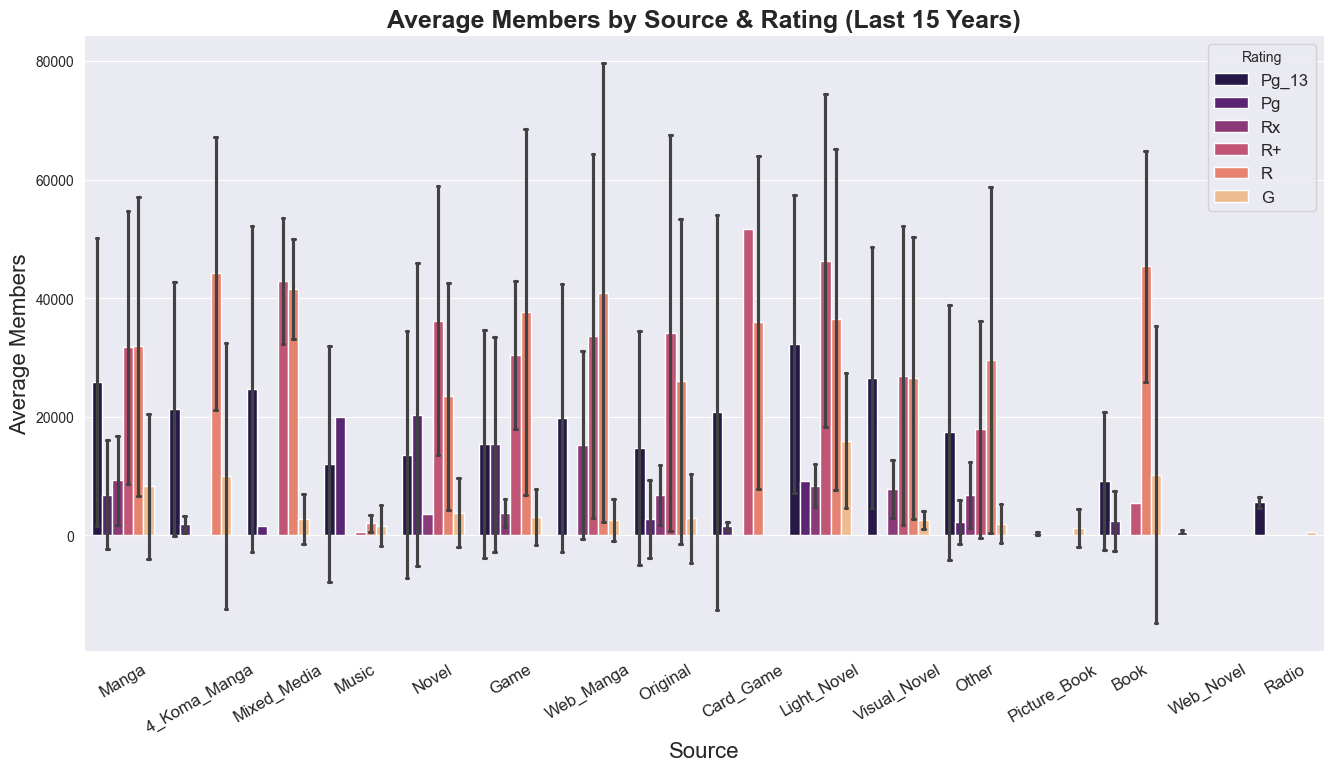

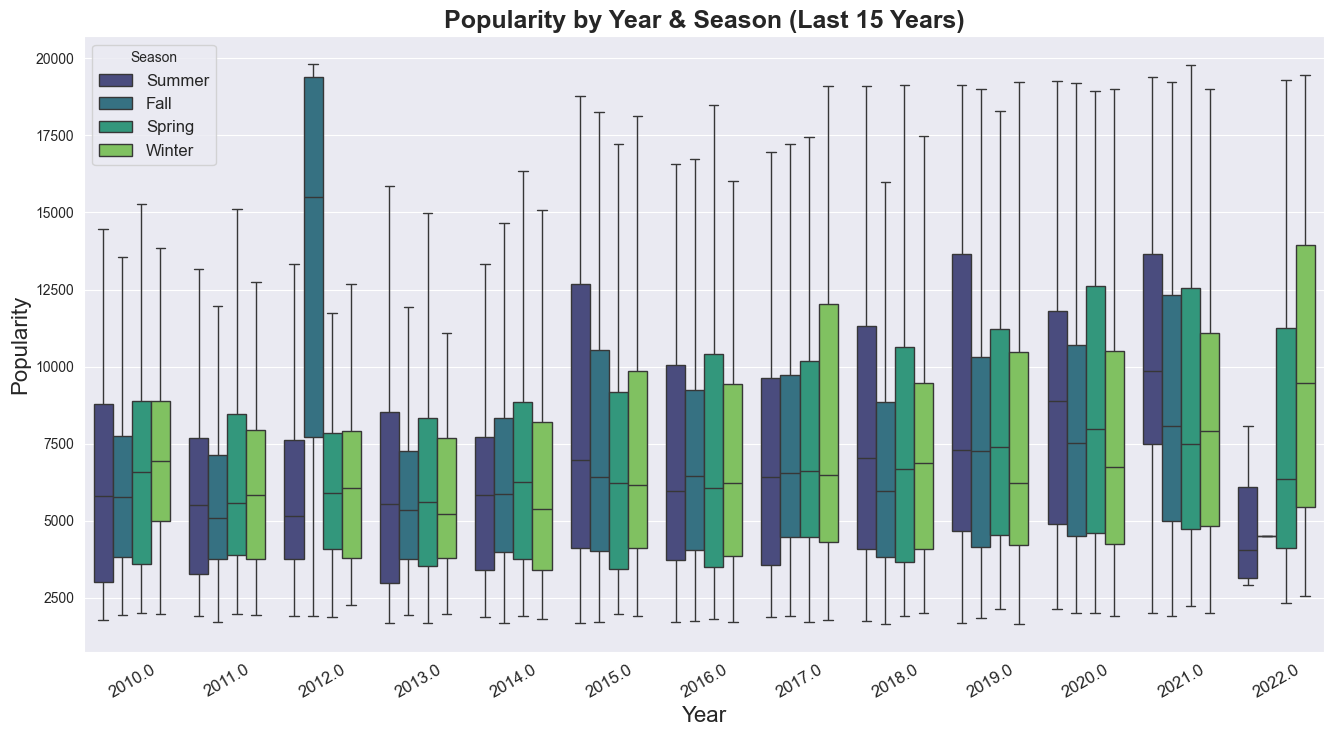

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("darkgrid")

# Define the last 15 years dynamically (assuming current year is 2025)
year_now = 2025
years_range = list(range(year_now - 15, year_now))

# Filter the data for the last 15 years
df_filtered = df[df["Year"].isin(years_range)]

# === 1. Score vs Type & Rating (Boxplot) ===
plt.figure(figsize=(16, 8))
sns.boxplot(x="Types", y="Score", hue="Rating", data=df_filtered, palette="coolwarm", 
            showfliers=False, dodge=True)
plt.title("Score Distribution by Type & Rating (Last 15 Years)", fontsize=18, fontweight="bold")
plt.xlabel("Types", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.xticks(rotation=30, fontsize=12)
plt.legend(title="Rating", fontsize=12)
plt.show()

# === 2. Members vs Source & Rating (Bar Plot) ===
plt.figure(figsize=(16, 8))
sns.barplot(x="Source", y="Members", hue="Rating", data=df_filtered, palette="magma", 
            estimator=np.mean, ci="sd", capsize=0.2, dodge=True)
plt.title("Average Members by Source & Rating (Last 15 Years)", fontsize=18, fontweight="bold")
plt.xlabel("Source", fontsize=16)
plt.ylabel("Average Members", fontsize=16)
plt.xticks(rotation=30, fontsize=12)
plt.legend(title="Rating", fontsize=12)
plt.show()

# === 3. Popularity vs Year & Season (Boxplot) ===
plt.figure(figsize=(16, 8))
sns.boxplot(x="Year", y="Popularity", hue="Season", data=df_filtered, palette="viridis", 
            showfliers=False, dodge=True)
plt.title("Popularity by Year & Season (Last 15 Years)", fontsize=18, fontweight="bold")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Popularity", fontsize=16)
plt.xticks(rotation=30, fontsize=12)
plt.legend(title="Season", fontsize=12)
plt.show()

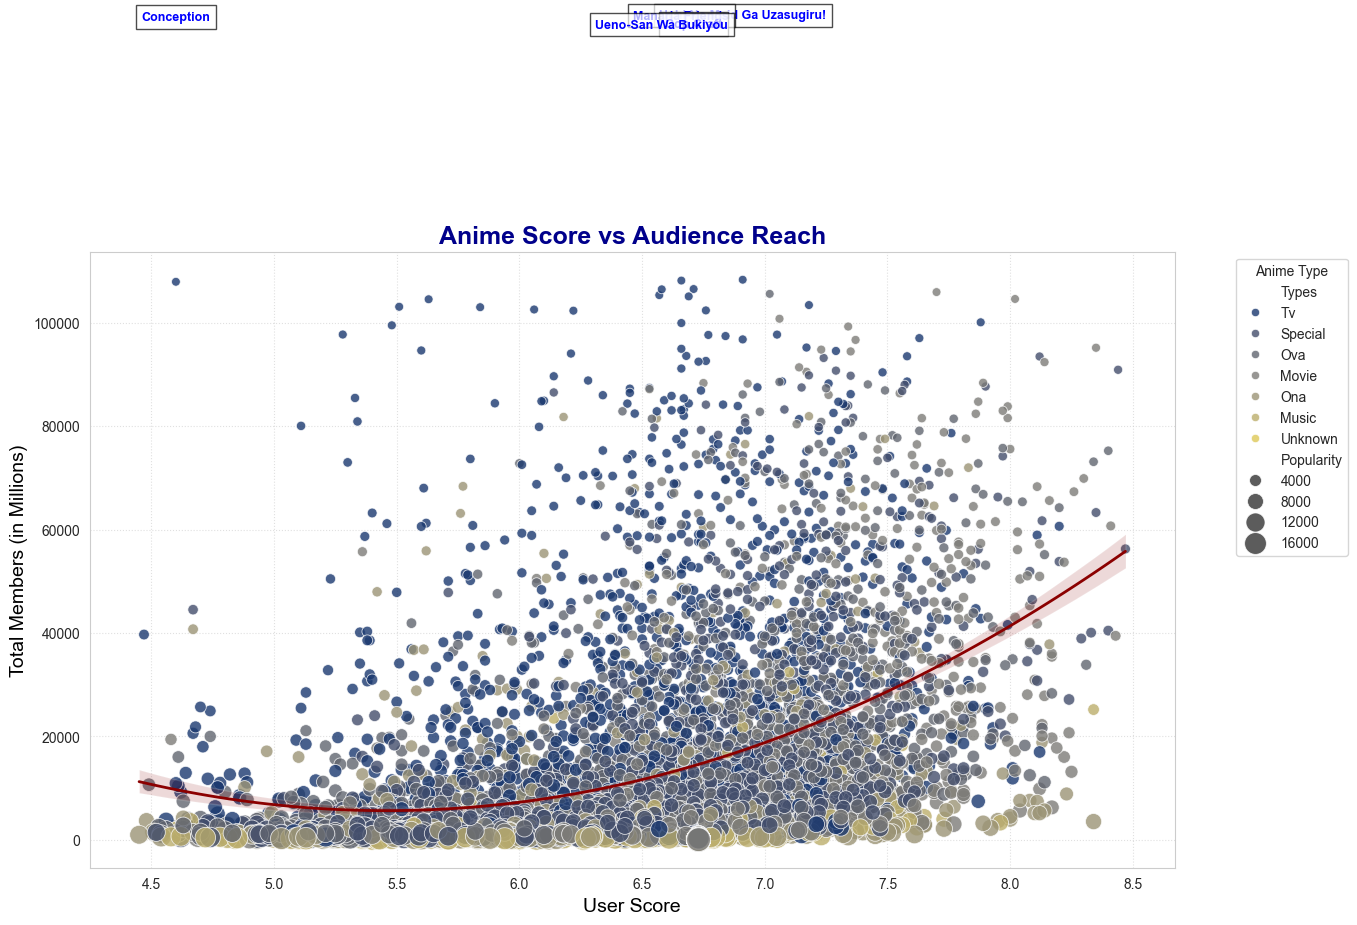

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("whitegrid")

# Create Scatter Plot with different aesthetics
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(x="Score", y="Members", hue="Types", data=df, 
                          palette="cividis", alpha=0.8, edgecolor="white", linewidth=0.6, size="Popularity", sizes=(40, 300))

# Add a Polynomial Trend Line for a Different Effect
sns.regplot(x="Score", y="Members", data=df, scatter=False, color="darkred", 
            order=2, line_kws={"linestyle": "solid", "linewidth": 2})

# Annotate Top 5 Most Popular Anime (based on Members) with an Offset
top_anime = df.nlargest(5, "Members")
for _, row in top_anime.iterrows():
    plt.text(row["Score"], row["Members"] + 50000, row["Title"], fontsize=9, 
             ha="center", va="bottom", color="blue", fontweight="bold", 
             bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"))

# Formatting: Titles, Labels, and Legend
plt.title("Anime Score vs Audience Reach", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("User Score", fontsize=14, color="black")
plt.ylabel("Total Members (in Millions)", fontsize=14, color="black")
plt.legend(title="Anime Type", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside for clarity
plt.grid(True, linestyle=":", alpha=0.6)

# Show Plot
plt.show()


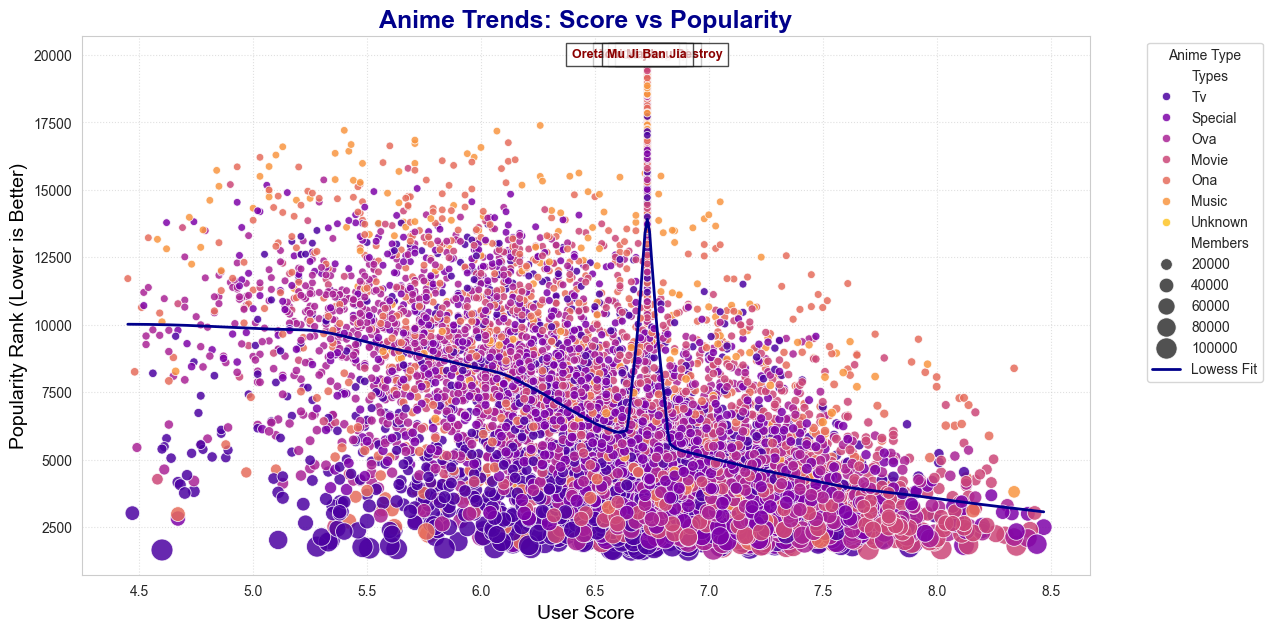

In [64]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create Scatter Plot with adjusted aesthetics
plt.figure(figsize=(13, 7))
scatter = sns.scatterplot(x="Score", y="Popularity", hue="Types", data=df, 
                          palette="plasma", alpha=0.85, edgecolor="white", linewidth=0.6, size="Members", sizes=(30, 250))

# Add a Smooth Trend Line (Lowess Smoothing)
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(df["Popularity"], df["Score"], frac=0.2)
plt.plot(lowess[:, 0], lowess[:, 1], color="darkblue", linestyle="solid", linewidth=2, label="Lowess Fit")

# Annotate Top 5 Most Popular Anime with Different Positioning
top_anime = df.nlargest(5, "Popularity")
for _, row in top_anime.iterrows():
    plt.text(row["Score"], row["Popularity"], row["Title"], fontsize=9, ha="center", va="bottom", 
             color="darkred", fontweight="bold", bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"))

# Formatting: Titles, Labels, and Legend
plt.title("Anime Trends: Score vs Popularity", fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel("User Score", fontsize=14, color="black")
plt.ylabel("Popularity Rank (Lower is Better)", fontsize=14, color="black")
plt.legend(title="Anime Type", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside for clarity
plt.grid(True, linestyle=":", alpha=0.6)

# Show Plot
plt.show()


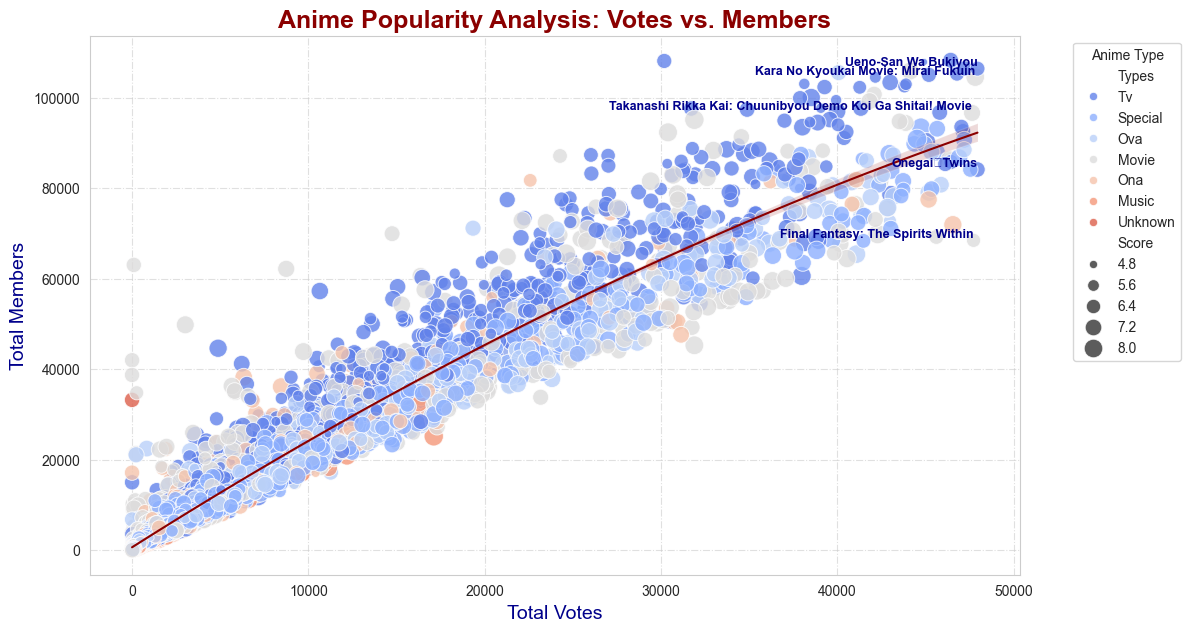

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set_style("whitegrid")

# Create Scatter Plot with modified styling
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(x="Votes", y="Members", hue="Types", data=df, 
                          palette="coolwarm", alpha=0.8, edgecolor="white", linewidth=0.7, size="Score", sizes=(20, 200))

# Add a Polynomial Trend Line (Degree 2)
sns.regplot(x="Votes", y="Members", data=df, scatter=False, color="darkred", 
            line_kws={"linestyle": "solid", "linewidth": 1.5}, order=2)

# Annotate Top 5 Most Voted Anime
top_anime = df.nlargest(5, "Votes")
for _, row in top_anime.iterrows():
    plt.text(row["Votes"], row["Members"], row["Title"], fontsize=9, ha="right", 
             va="bottom", color="darkblue", fontweight="bold")

# Formatting: Titles, Labels, and Legend
plt.title("Anime Popularity Analysis: Votes vs. Members", fontsize=18, fontweight="bold", color="darkred")
plt.xlabel("Total Votes", fontsize=14, color="darkblue")
plt.ylabel("Total Members", fontsize=14, color="darkblue")
plt.legend(title="Anime Type", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside for clarity
plt.grid(True, linestyle="-.", alpha=0.6)

# Show Plot
plt.show()
